Optimal Policy:
Time 0: [ -4   0   0   0  -4   0  -3  -2 -10  -1  -1   0  -1  -5  -1  -7   0  -7
  -4  -4  -7]
Time 1: [ 0  0  0 -1  0 -9  0 -6  0 -3  0  0 -1  0 -1 -8  0 -6 -4 -6 -2]
Time 2: [  0   0   0   0   0   0  -1   0   0   0  -3   0  -4  -6  -8  -5  -6  -5
  -2  -6 -10]
Time 3: [-10  -1   0  -5  -1  -2   0  -8  -3   0   0  -4  -6  -1  -6  -9  -8  -5
  -7  -9  -9]
Time 4: [ -2   0   0   0  -5   0   0   0  -7   0   0  -3   0  -1  -9  -7  -5  -9
 -10  -7  -4]
Time 5: [-3  0  0  0  0  0  0 -1  0 -2  0 -2 -1 -1 -8 -5  0 -7 -8 -7 -6]
Time 6: [ -1  -3   0   0   0  -7   0   0   0  -4   0   0 -10  -5  -6  -5  -3  -5
  -7  -7  -5]
Time 7: [ -1   0   0   0   0  -1   0  -2   0  -5  -2  -3  -4  -4  -5  -5 -10 -10
 -10  -4 -10]
Time 8: [ 0  0 -3  0  0 -3  0  0 -2 -4 -3 -4 -3 -3 -3 -6 -7 -8 -5 -7 -9]
Time 9: [ -9 -10   0   0   0  -6  -6   0  -8  -7  -6  -8  -9  -6 -10 -10  -7  -7
  -8  -7 -10]


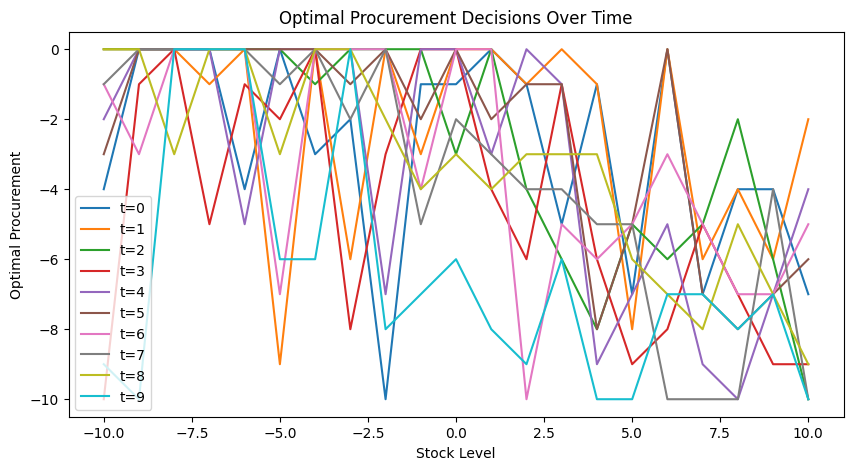

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 10  # Finite horizon
a, b = 2, 5  # Holding and backlog cost rates
p = 3  # Procurement cost per unit
U = 10  # Maximum procurement
num_episodes = 5000  # Number of Monte Carlo simulations

# Demand distribution PW ~ Uniform[0,10]
def sample_demand():
    return np.random.randint(0, 11)

# Holding cost function
def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Initialize policy arbitrarily
policy = np.random.randint(0, U+1, size=(T+1, 21))  # (time, stock levels from -10 to 10)

# Initialize value function
Q = np.zeros((T+1, 21, U+1))  # (time, stock levels, procurement actions)
returns = [[[] for _ in range(21)] for _ in range(T+1)]

# Monte Carlo Control Algorithm
for episode in range(num_episodes):
    X = np.zeros(T+1, dtype=int)
    U_values = np.zeros(T, dtype=int)
    W = np.zeros(T, dtype=int)
    rewards = np.zeros(T, dtype=float)
    
    # Start with a random stock level (between -10 and 10 for exploration)
    X[0] = np.random.randint(-10, 11)
    
    # Generate an episode
    for t in range(T):
        U_values[t] = policy[t, np.clip(X[t] + 10, 0, 20)]  # Clip to valid range
        # Get action from policy
        W[t] = sample_demand()
        X[t+1] = X[t] + U_values[t] - W[t]
        rewards[t] = holding_cost(X[t+1]) + p * U_values[t]
    
    # Compute returns and update Q-values
    G = 0
    for t in reversed(range(T)):
        G = rewards[t] + G  # No discount factor (γ=1)
        state_idx = np.clip(X[t] + 10, 0, 20)
        returns[t][state_idx].append(G)
        Q[t, state_idx, U_values[t]] = np.mean(returns[t][state_idx])
        
        # Policy improvement (greedy update)
        policy[t, state_idx] = np.argmin(Q[t, state_idx])

# Print optimal policy
print("Optimal Policy:")
for t in range(T):
    print(f"Time {t}: {policy[t] - 10}")

# Plot optimal procurement decisions
plt.figure(figsize=(10, 5))
for t in range(T):
    plt.plot(range(-10, 11), policy[t] - 10, label=f"t={t}")
plt.xlabel("Stock Level")
plt.ylabel("Optimal Procurement")
plt.legend()
plt.title("Optimal Procurement Decisions Over Time")
plt.show()


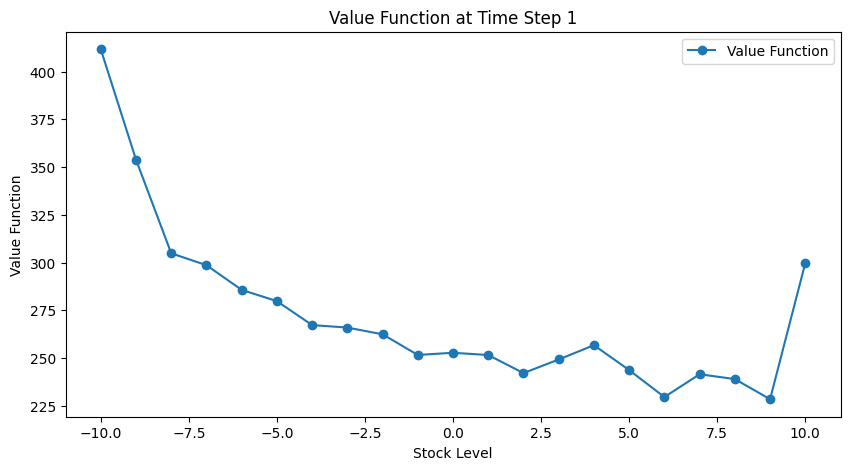

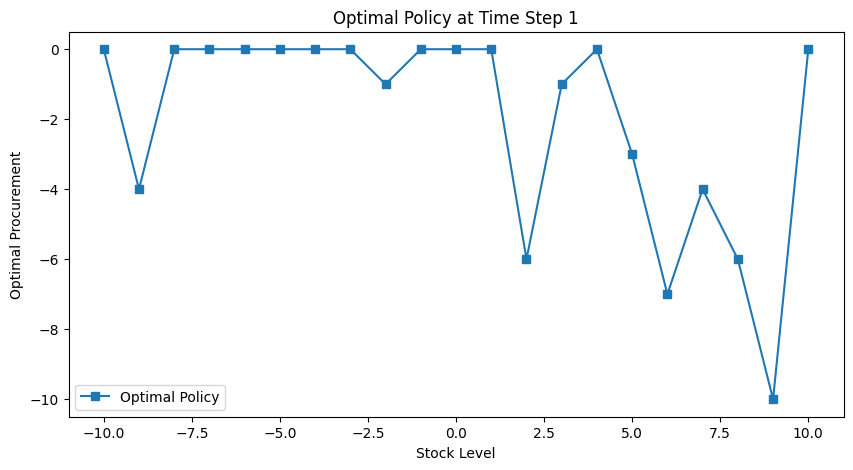

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 10  # Finite horizon
a, b = 2, 5  # Holding and backlog cost rates
p = 3  # Procurement cost per unit
U = 10  # Maximum procurement
num_episodes = 5000  # Number of Monte Carlo simulations

# Demand distribution PW ~ Uniform[0,10]
def sample_demand():
    return np.random.randint(0, 11)

# Holding cost function
def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Initialize policy arbitrarily
policy = np.random.randint(0, U+1, size=(T+1, 21))  # (time, stock levels from -10 to 10)

# Initialize value function
Q = np.zeros((T+1, 21, U+1))  # (time, stock levels, procurement actions)
returns = [[[] for _ in range(21)] for _ in range(T+1)]

# Monte Carlo Control Algorithm
for episode in range(num_episodes):
    X = np.zeros(T+1, dtype=int)
    U_values = np.zeros(T, dtype=int)
    W = np.zeros(T, dtype=int)
    rewards = np.zeros(T, dtype=float)
    
    # Start with a random stock level (between -10 and 10 for exploration)
    X[0] = np.random.randint(-10, 11)
    
    # Generate an episode
    for t in range(T):
        state_idx = np.clip(X[t] + 10, 0, 20)
        U_values[t] = policy[t, state_idx]  # Get action from policy
        W[t] = sample_demand()
        X[t+1] = X[t] + U_values[t] - W[t]
        rewards[t] = holding_cost(X[t+1]) + p * U_values[t]
    
    # Compute returns and update Q-values
    G = 0
    for t in reversed(range(T)):
        G = rewards[t] + G  # No discount factor (γ=1)
        state_idx = np.clip(X[t] + 10, 0, 20)
        returns[t][state_idx].append(G)
        Q[t, state_idx, U_values[t]] = np.mean(returns[t][state_idx])
        
        # Policy improvement (greedy update)
        policy[t, state_idx] = np.argmin(Q[t, state_idx])

# Plot value function and optimal policy at a certain time step
time_step = 1
stock_levels = np.arange(-10, 11)

plt.figure(figsize=(10, 5))
plt.plot(stock_levels, np.min(Q[time_step], axis=1), label="Value Function", marker="o")
plt.xlabel("Stock Level")
plt.ylabel("Value Function")
plt.title(f"Value Function at Time Step {time_step}")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(stock_levels, policy[time_step] - 10, label="Optimal Policy", marker="s")
plt.xlabel("Stock Level")
plt.ylabel("Optimal Procurement")
plt.title(f"Optimal Policy at Time Step {time_step}")
plt.legend()
plt.show()


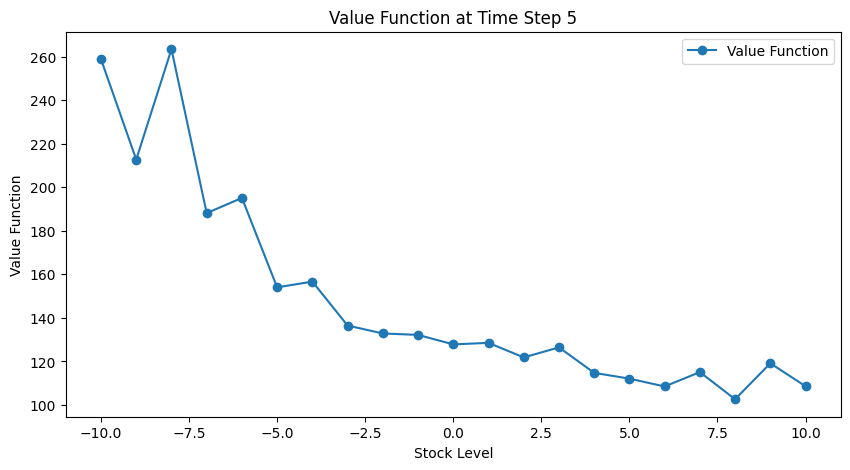

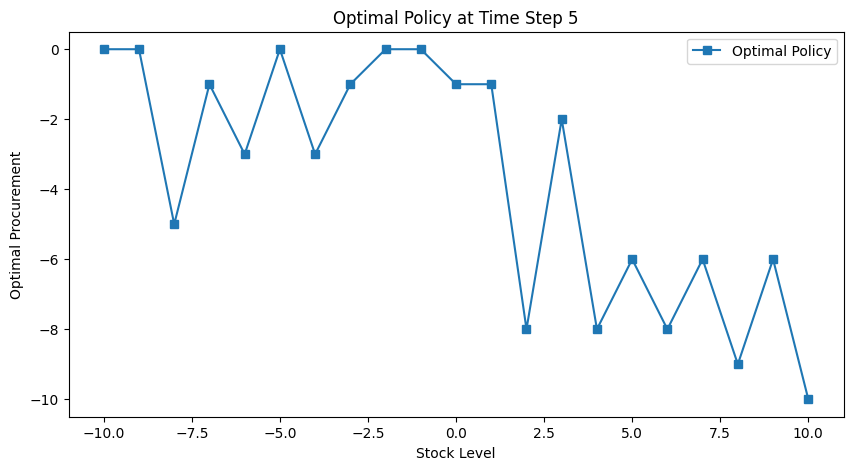

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 10  # Finite horizon
a, b = 2, 5  # Holding and backlog cost rates
p = 3  # Procurement cost per unit
U = 10  # Maximum procurement
num_episodes = 10000  # Number of Monte Carlo simulations

# Demand distribution PW ~ Uniform[0,10]
def sample_demand():
    return np.random.randint(0, 11)

# Holding cost function
def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Initialize policy arbitrarily
policy = np.random.randint(0, U+1, size=(T+1, 21))  # (time, stock levels from -10 to 10)

# Initialize value function
Q = np.zeros((T+1, 21, U+1))  # (time, stock levels, procurement actions)
returns = [[[] for _ in range(21)] for _ in range(T+1)]

# Monte Carlo Control Algorithm
for episode in range(num_episodes):
    X = np.zeros(T+1, dtype=int)
    U_values = np.zeros(T, dtype=int)
    W = np.zeros(T, dtype=int)
    rewards = np.zeros(T, dtype=float)
    
    # Start with a random stock level (between -10 and 10 for exploration)
    X[0] = np.random.randint(-10, 11)
    
    # Generate an episode
    for t in range(T):
        state_idx = np.clip(X[t] + 10, 0, 20)
        U_values[t] = policy[t, state_idx]  # Get action from policy
        W[t] = sample_demand()
        X[t+1] = X[t] + U_values[t] - W[t]
        rewards[t] = holding_cost(X[t+1]) + p * U_values[t]
    
    # Compute returns and update Q-values
    G = 0
    for t in reversed(range(T)):
        G = rewards[t] + G  # No discount factor (γ=1)
        state_idx = np.clip(X[t] + 10, 0, 20)
        returns[t][state_idx].append(G)
        Q[t, state_idx, U_values[t]] = np.mean(returns[t][state_idx])
        
        # Policy improvement (greedy update)
        policy[t, state_idx] = np.argmin(Q[t, state_idx])

# Plot value function and optimal policy at a certain time step
time_step = 5
stock_levels = np.arange(-10, 11)

plt.figure(figsize=(10, 5))
plt.plot(stock_levels, np.min(Q[time_step], axis=1), label="Value Function", marker="o")
plt.xlabel("Stock Level")
plt.ylabel("Value Function")
plt.title(f"Value Function at Time Step {time_step}")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(stock_levels, policy[time_step] - 10, label="Optimal Policy", marker="s")
plt.xlabel("Stock Level")
plt.ylabel("Optimal Procurement")
plt.title(f"Optimal Policy at Time Step {time_step}")
plt.legend()
plt.show()


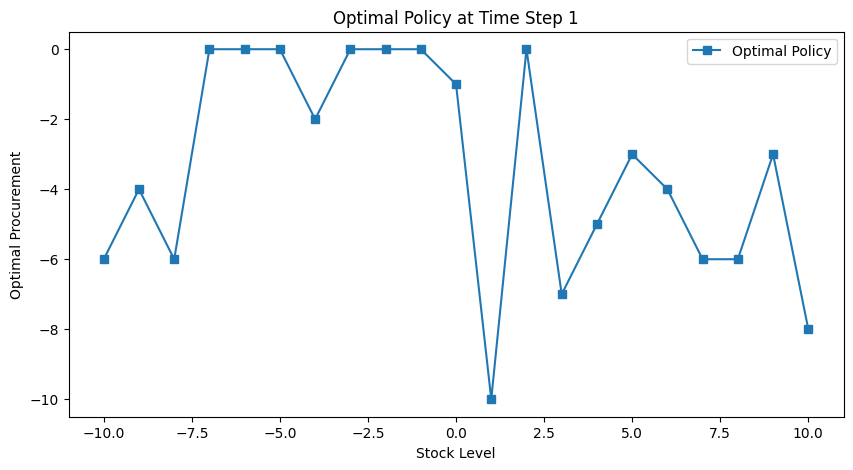

In [7]:
time_step = 1
plt.figure(figsize=(10, 5))
plt.plot(stock_levels, policy[time_step] - 10, label="Optimal Policy", marker="s")
plt.xlabel("Stock Level")
plt.ylabel("Optimal Procurement")
plt.title(f"Optimal Policy at Time Step {time_step}")
plt.legend()
plt.show()


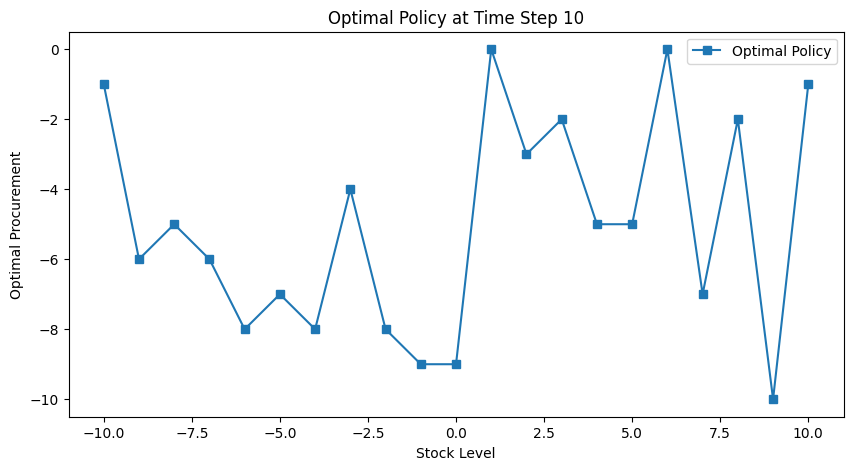

In [8]:
time_step = 10
plt.figure(figsize=(10, 5))
plt.plot(stock_levels, policy[time_step] - 10, label="Optimal Policy", marker="s")
plt.xlabel("Stock Level")
plt.ylabel("Optimal Procurement")
plt.title(f"Optimal Policy at Time Step {time_step}")
plt.legend()
plt.show()

**We can see that the model is identifying a non stationary optimal policy for different time steps**

Increasing the range of the state space

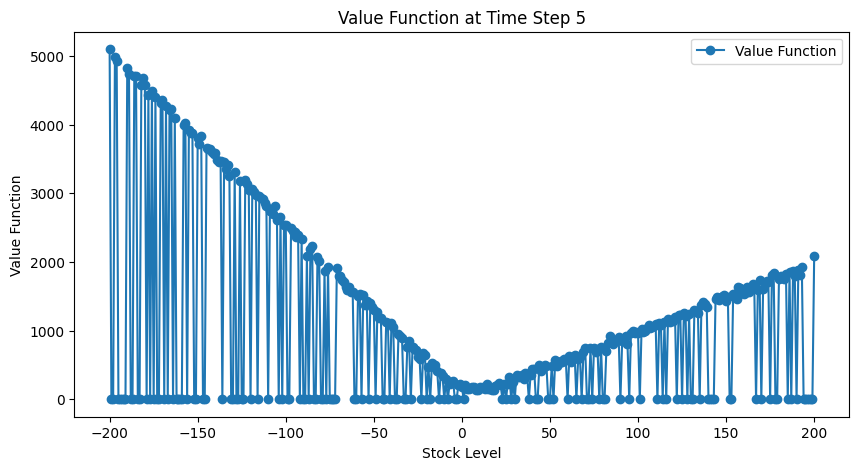

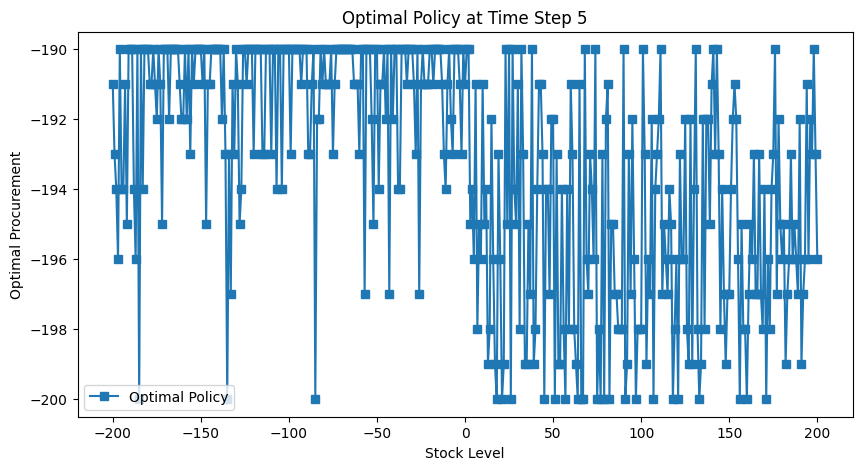

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 10  # Finite horizon
a, b = 2, 5  # Holding and backlog cost rates
p = 3  # Procurement cost per unit
U = 10  # Maximum procurement
num_episodes = 5000  # Number of Monte Carlo simulations

# Demand distribution PW ~ Uniform[0,10]
def sample_demand():
    return np.random.randint(0, 11)

# Holding cost function
def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Initialize policy arbitrarily
policy = np.random.randint(0, U+1, size=(T+1, 401))  # (time, stock levels from -200 to 200)

# Initialize value function
Q = np.zeros((T+1, 401, U+1))  # (time, stock levels, procurement actions)
returns = [[[] for _ in range(401)] for _ in range(T+1)]

# Monte Carlo Control Algorithm
for episode in range(num_episodes):
    X = np.zeros(T+1, dtype=int)
    U_values = np.zeros(T, dtype=int)
    W = np.zeros(T, dtype=int)
    rewards = np.zeros(T, dtype=float)
    
    # Start with a random stock level (between -200 and 200 for exploration)
    X[0] = np.random.randint(-200, 201)
    
    # Generate an episode
    for t in range(T):
        state_idx = np.clip(X[t] + 200, 0, 400)
        U_values[t] = policy[t, state_idx]  # Get action from policy
        W[t] = sample_demand()
        X[t+1] = X[t] + U_values[t] - W[t]
        rewards[t] = holding_cost(X[t+1]) + p * U_values[t]
    
    # Compute returns and update Q-values
    G = 0
    for t in reversed(range(T)):
        G = rewards[t] + G  # No discount factor (γ=1)
        state_idx = np.clip(X[t] + 200, 0, 400)
        returns[t][state_idx].append(G)
        Q[t, state_idx, U_values[t]] = np.mean(returns[t][state_idx])
        
        # Policy improvement (greedy update)
        policy[t, state_idx] = np.argmin(Q[t, state_idx])

# Plot value function and optimal policy at a certain time step
time_step = 5
stock_levels = np.arange(-200, 201)

plt.figure(figsize=(10, 5))
plt.plot(stock_levels, np.min(Q[time_step], axis=1), label="Value Function", marker="o")
plt.xlabel("Stock Level")
plt.ylabel("Value Function")
plt.title(f"Value Function at Time Step {time_step}")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(stock_levels, policy[time_step], label="Optimal Policy", marker="s")
plt.xlabel("Stock Level")
plt.ylabel("Optimal Procurement")
plt.title(f"Optimal Policy at Time Step {time_step}")
plt.legend()
plt.show()


[1040.43589744    0.         1000.         1006.46153846    0.
  989.69230769  976.          975.9375      956.            0.
  965.83333333  963.5           0.            0.            0.
  939.5         938.57142857  929.61538462  934.15384615  928.53846154
  918.66666667  902.66666667    0.          899.33333333    0.
    0.            0.            0.            0.          870.
    0.          854.23076923    0.          849.6         844.54545455
    0.            0.          818.11111111  829.5           0.
  810.          810.35714286  798.          795.42857143  797.
  791.36363636    0.            0.          771.42857143  770.71428571
  750.          757.72727273  750.8         737.66666667    0.
  723.33333333  731.5         736.5625        0.          723.75
  717.5           0.          704.          698.33333333  690.90909091
  687.1           0.          672.            0.          668.66666667
  665.41666667  658.11111111    0.          651.            0.
  634.       

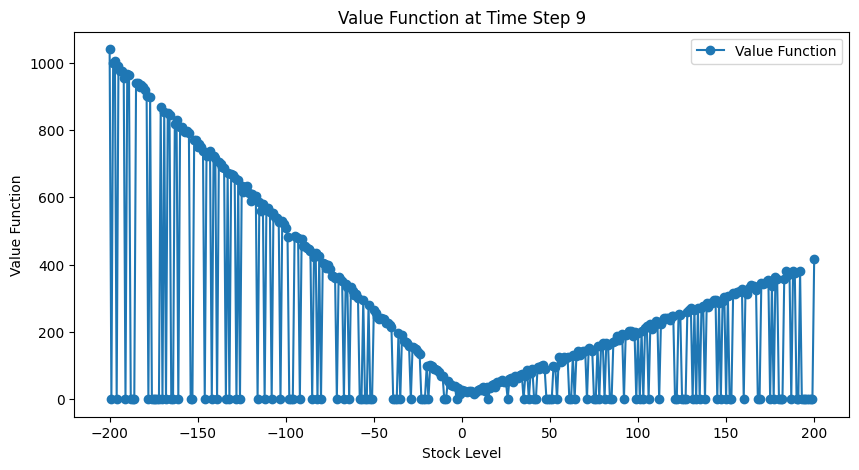

In [14]:
time_step = 9
print(np.min(Q[time_step], axis=1))
plt.figure(figsize=(10, 5))
plt.plot(stock_levels, np.min(Q[time_step], axis=1), label="Value Function", marker="o")
plt.xlabel("Stock Level")
plt.ylabel("Value Function")
plt.title(f"Value Function at Time Step {time_step}")
plt.legend()
plt.show()

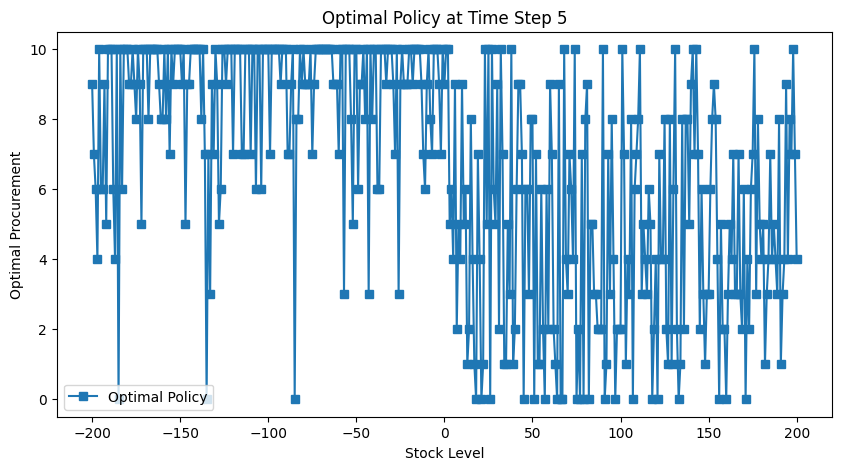

In [10]:
time_step = 5

plt.figure(figsize=(10, 5))
plt.plot(stock_levels, policy[time_step], label="Optimal Policy", marker="s")
plt.xlabel("Stock Level")
plt.ylabel("Optimal Procurement")
plt.title(f"Optimal Policy at Time Step {time_step}")
plt.legend()
plt.show()

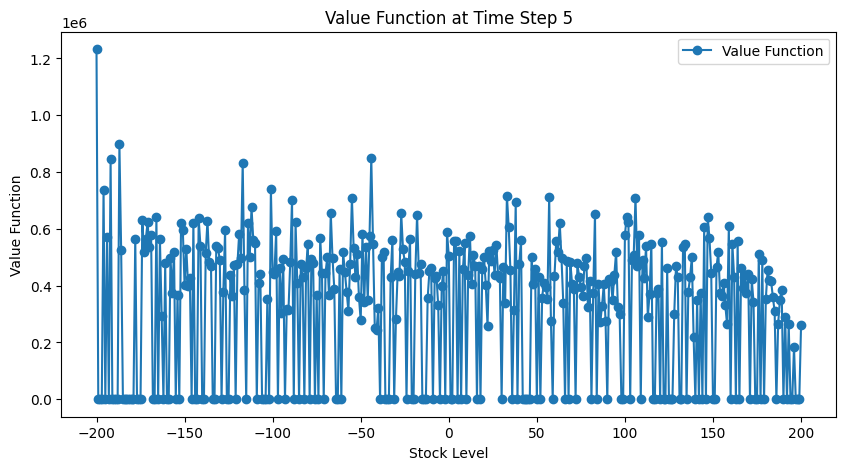

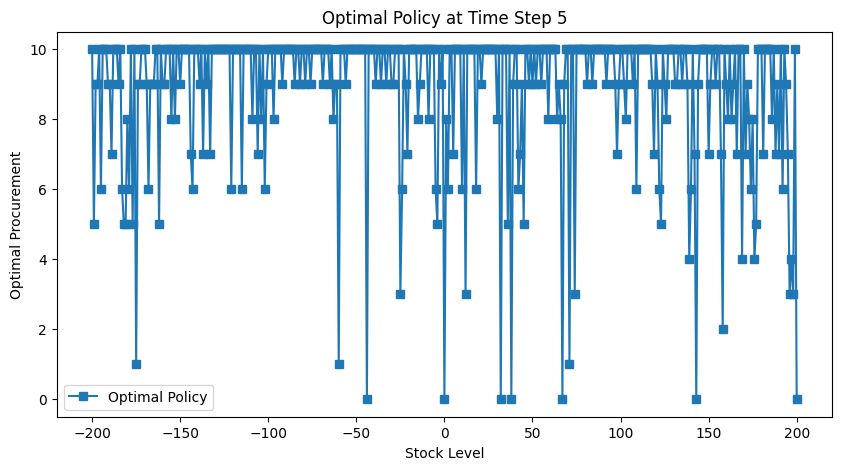

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1000  # Finite horizon
a, b = 2, 5  # Holding and backlog cost rates
p = 3  # Procurement cost per unit
U = 10  # Maximum procurement
num_episodes = 5000  # Number of Monte Carlo simulations

# Demand distribution PW ~ Uniform[0,10]
def sample_demand():
    return np.random.randint(0, 11)

# Holding cost function
def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Initialize policy arbitrarily
policy = np.random.randint(0, U+1, size=(T+1, 401))  # (time, stock levels from -200 to 200)

# Initialize value function
Q = np.zeros((T+1, 401, U+1))  # (time, stock levels, procurement actions)
returns = [[[] for _ in range(401)] for _ in range(T+1)]

# Monte Carlo Control Algorithm
for episode in range(num_episodes):
    X = np.zeros(T+1, dtype=int)
    U_values = np.zeros(T, dtype=int)
    W = np.zeros(T, dtype=int)
    rewards = np.zeros(T, dtype=float)
    
    # Start with a random stock level (between -200 and 200 for exploration)
    X[0] = np.random.randint(-200, 201)
    
    # Generate an episode
    for t in range(T):
        state_idx = np.clip(X[t] + 200, 0, 400)
        U_values[t] = policy[t, state_idx]  # Get action from policy
        W[t] = sample_demand()
        X[t+1] = X[t] + U_values[t] - W[t]
        rewards[t] = holding_cost(X[t+1]) + p * U_values[t]
    
    # Compute returns and update Q-values
    G = 0
    for t in reversed(range(T)):
        G = rewards[t] + G  # No discount factor (γ=1)
        state_idx = np.clip(X[t] + 200, 0, 400)
        returns[t][state_idx].append(G)
        Q[t, state_idx, U_values[t]] = np.mean(returns[t][state_idx])
        
        # Policy improvement (greedy update)
        policy[t, state_idx] = np.argmin(Q[t, state_idx])

# Plot value function and optimal policy at a certain time step
time_step = 5
stock_levels = np.arange(-200, 201)

plt.figure(figsize=(10, 5))
plt.plot(stock_levels, np.min(Q[time_step], axis=1), label="Value Function", marker="o")
plt.xlabel("Stock Level")
plt.ylabel("Value Function")
plt.title(f"Value Function at Time Step {time_step}")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(stock_levels, policy[time_step], label="Optimal Policy", marker="s")
plt.xlabel("Stock Level")
plt.ylabel("Optimal Procurement")
plt.title(f"Optimal Policy at Time Step {time_step}")
plt.legend()
plt.show()


In [ ]:
print(np.min(Q[time_step], axis=1))

[1232668.025            0.               0.               0.
  737182.21428571       0.          572973.               0.
  846981.66666667       0.               0.               0.
       0.          898703.18181818  524000.15384615       0.
       0.               0.               0.               0.
       0.               0.          565961.               0.
       0.               0.          630027.25        517554.21428571
  563760.9375      623244.57142857  535701.625       577842.61538462
       0.               0.          641095.66666667       0.
  564006.6875      291594.5              0.          478335.76923077
       0.               0.          497849.85714286  372386.4375
  519744.76923077       0.          367278.72222222       0.
  621538.66666667  597359.5         401521.83333333  530477.71428571
  397117.          427679.83333333       0.          622125.21428571
       0.               0.          637132.91666667  541213.29411765
       0.               0.       

## Using exploring starts

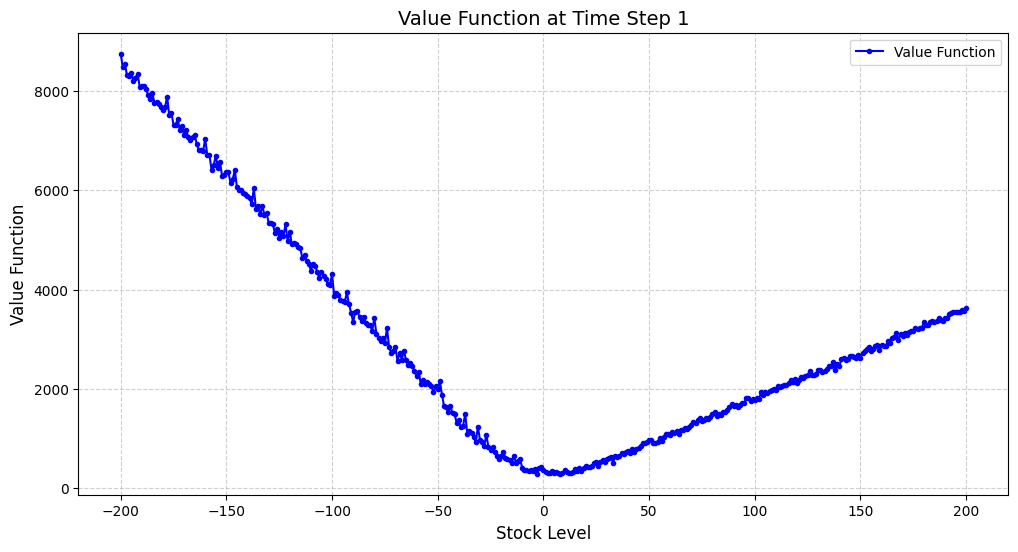

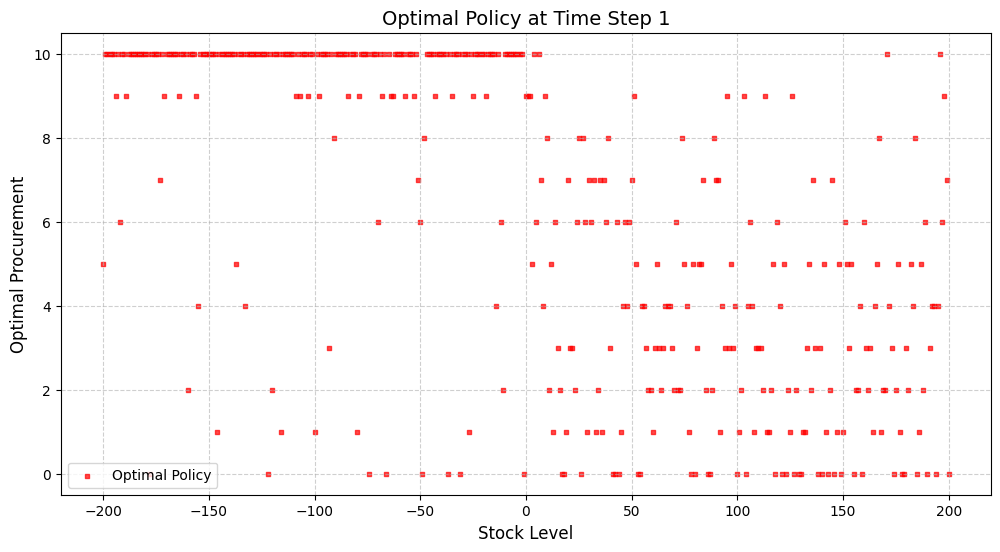

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 10  # Finite horizon
a, b = 2, 5  # Holding and backlog cost rates
p = 3  # Procurement cost per unit
U = 10  # Maximum procurement
num_episodes = 15000  # Number of Monte Carlo simulations

# Demand distribution PW ~ Uniform[0,10]
def sample_demand():
    return np.random.randint(0, 11)

# Holding cost function
def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Initialize policy arbitrarily
policy = np.random.randint(0, U+1, size=(T+1, 401))  # (time, stock levels from -200 to 200)

# Initialize value function
Q = np.zeros((T+1, 401, U+1))  # (time, stock levels, procurement actions)
returns = [[[] for _ in range(401)] for _ in range(T+1)]

# Monte Carlo Control Algorithm with Exploring Starts
for episode in range(num_episodes):
    X = np.zeros(T+1, dtype=int)
    U_values = np.zeros(T, dtype=int)
    W = np.zeros(T, dtype=int)
    rewards = np.zeros(T, dtype=float)
    
    # Exploring starts: Initialize stock and action randomly
    X[0] = np.random.randint(-200, 201)
    U_values[0] = np.random.randint(0, U+1)  # Random initial action
    
    # Generate an episode
    for t in range(T):
        state_idx = np.clip(X[t] + 200, 0, 400)
        if t > 0:
            U_values[t] = policy[t, state_idx]  # Get action from policy after the first step
        W[t] = sample_demand()
        X[t+1] = X[t] + U_values[t] - W[t]
        rewards[t] = holding_cost(X[t+1]) + p * U_values[t]
    
    # Compute returns and update Q-values
    G = 0
    for t in reversed(range(T)):
        G = rewards[t] + G  # No discount factor (γ=1)
        state_idx = np.clip(X[t] + 200, 0, 400)
        returns[t][state_idx].append(G)
        Q[t, state_idx, U_values[t]] = np.mean(returns[t][state_idx])
        
        # Policy improvement (greedy update)
        policy[t, state_idx] = np.argmin(Q[t, state_idx])

# Plot value function and optimal policy at a certain time step
time_step = 1
stock_levels = np.arange(-200, 201)
value_function = np.min(Q[time_step], axis=1)
optimal_policy = policy[time_step]

# Smoother Value Function Plot
plt.figure(figsize=(12, 6))
plt.plot(stock_levels, value_function, label="Value Function", marker="o", markersize=3, linestyle="-", linewidth=1.5, color="blue")
plt.xlabel("Stock Level", fontsize=12)
plt.ylabel("Value Function", fontsize=12)
plt.title(f"Value Function at Time Step {time_step}", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

# Improved Policy Scatter Plot
plt.figure(figsize=(12, 6))
plt.scatter(stock_levels, optimal_policy, label="Optimal Policy", marker="s", s=8, c="red", alpha=0.7)
plt.xlabel("Stock Level", fontsize=12)
plt.ylabel("Optimal Procurement", fontsize=12)
plt.title(f"Optimal Policy at Time Step {time_step}", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


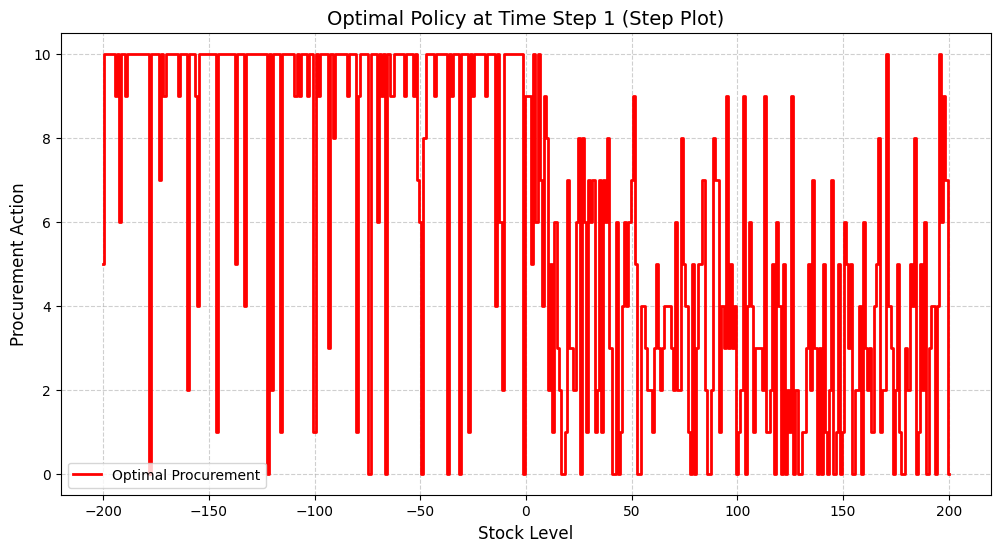

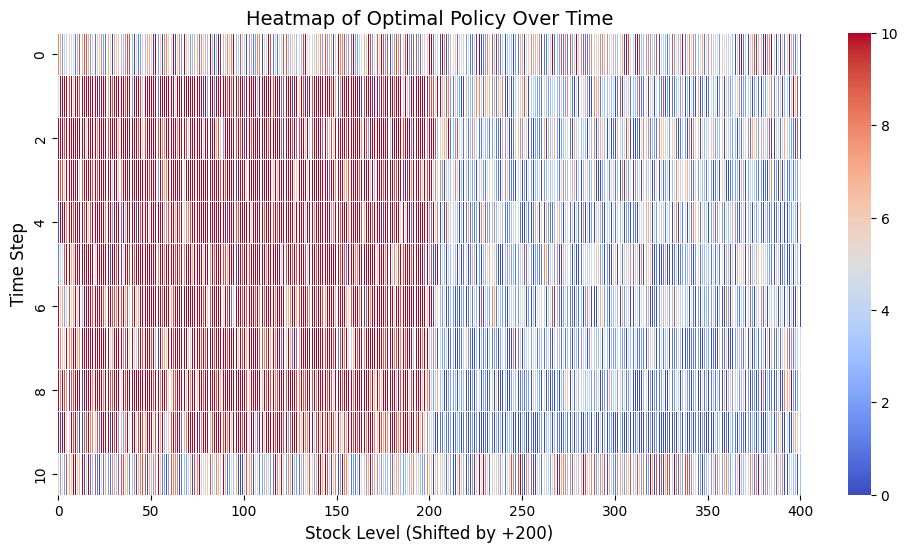

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optimal policy extraction
time_step = 1
stock_levels = np.arange(-200, 201)
optimal_policy = policy[time_step]

# **1. Step Plot for Optimal Policy**
plt.figure(figsize=(12, 6))
plt.step(stock_levels, optimal_policy, where="mid", color="red", linewidth=2, label="Optimal Procurement")
plt.xlabel("Stock Level", fontsize=12)
plt.ylabel("Procurement Action", fontsize=12)
plt.title(f"Optimal Policy at Time Step {time_step} (Step Plot)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

# **2. Heatmap of Policy Over Time**
plt.figure(figsize=(12, 6))
sns.heatmap(policy, cmap="coolwarm", cbar=True, xticklabels=50, yticklabels=2, linewidths=0.5)
plt.xlabel("Stock Level (Shifted by +200)", fontsize=12)
plt.ylabel("Time Step", fontsize=12)
plt.title("Heatmap of Optimal Policy Over Time", fontsize=14)
plt.show()


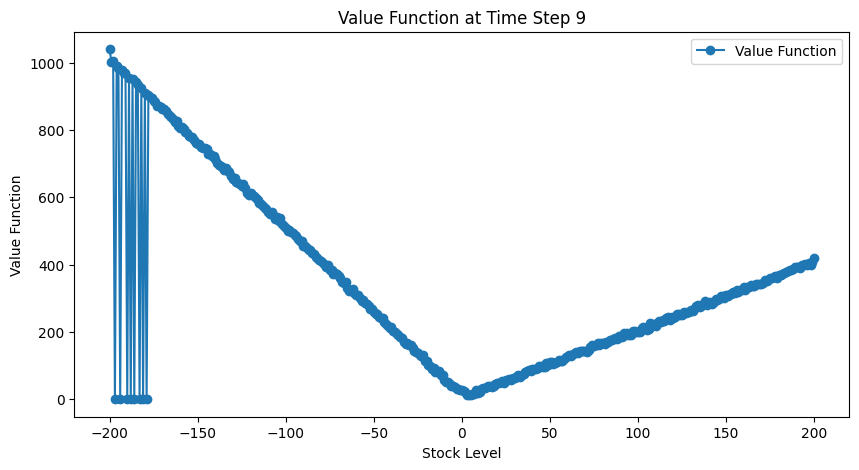

In [24]:
time_step = 9
stock_levels = np.arange(-200, 201)

plt.figure(figsize=(10, 5))
plt.plot(stock_levels, np.min(Q[time_step], axis=1), label="Value Function", marker="o")
plt.xlabel("Stock Level")
plt.ylabel("Value Function")
plt.title(f"Value Function at Time Step {time_step}")
plt.legend()
plt.show()


In [25]:
print(np.count_nonzero(np.min(Q[time_step], axis=1) == 0))

8


1. For fewer episodes, we got a lot of states with 0 values. This means the algorithm is not visiting the states. So on increasing the number of episodes, those 0 value states are filtered out.

2 . As we go across the horizon length, the probability of it reaching the extremes in decreasing. Thus, for time step 1, it visits all the states. But on increasing the time, the probability of it reaching the extremes goes down. 

## Using the policy we got above, we can use it to run another simulation. We kind of verify that it gets ot the same value function as in the plots above.

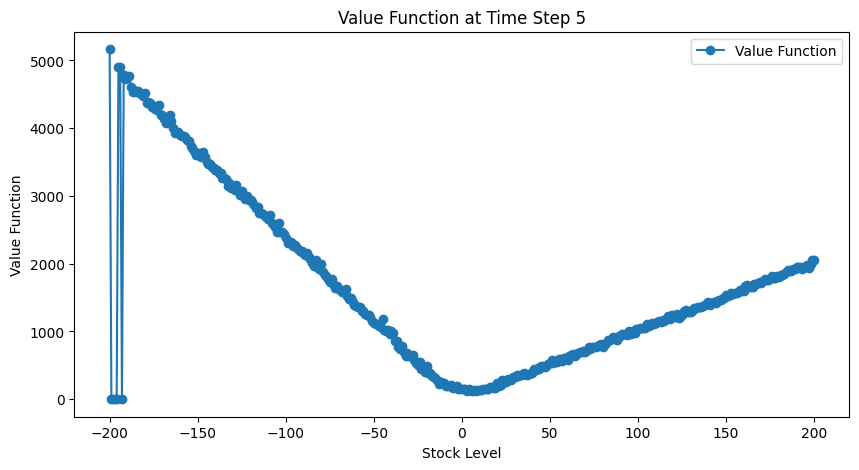

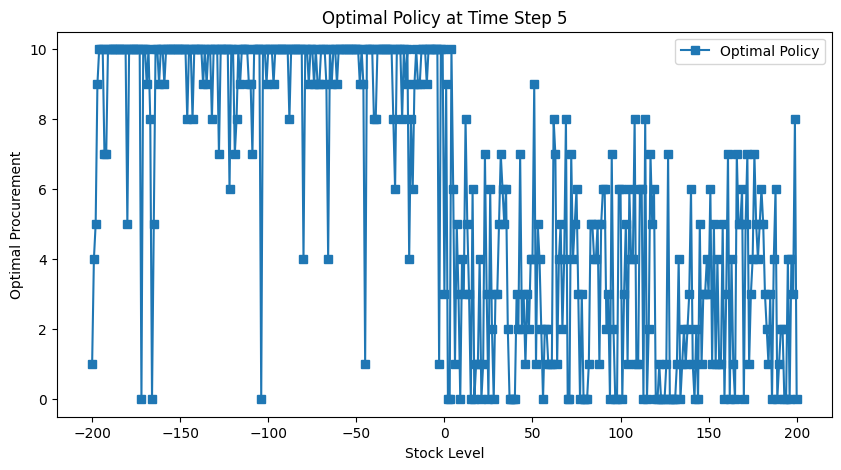

In [26]:
X_sim = np.zeros(T+1, dtype=int)
U_sim = np.zeros(T, dtype=int)
W_sim = np.zeros(T, dtype=int)
X_sim[0] = 0  # Start from zero stock

for t in range(T):
    state_idx = np.clip(X_sim[t] + 200, 0, 400)
    U_sim[t] = policy[t, state_idx]
    W_sim[t] = sample_demand()
    X_sim[t+1] = X_sim[t] + U_sim[t] - W_sim[t]

# Plot value function and optimal policy at a certain time step
time_step = 5
stock_levels = np.arange(-200, 201)

plt.figure(figsize=(10, 5))
plt.plot(stock_levels, np.min(Q[time_step], axis=1), label="Value Function", marker="o")
plt.xlabel("Stock Level")
plt.ylabel("Value Function")
plt.title(f"Value Function at Time Step {time_step}")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(stock_levels, policy[time_step], label="Optimal Policy", marker="s")
plt.xlabel("Stock Level")
plt.ylabel("Optimal Procurement")
plt.title(f"Optimal Policy at Time Step {time_step}")
plt.legend()
plt.show()


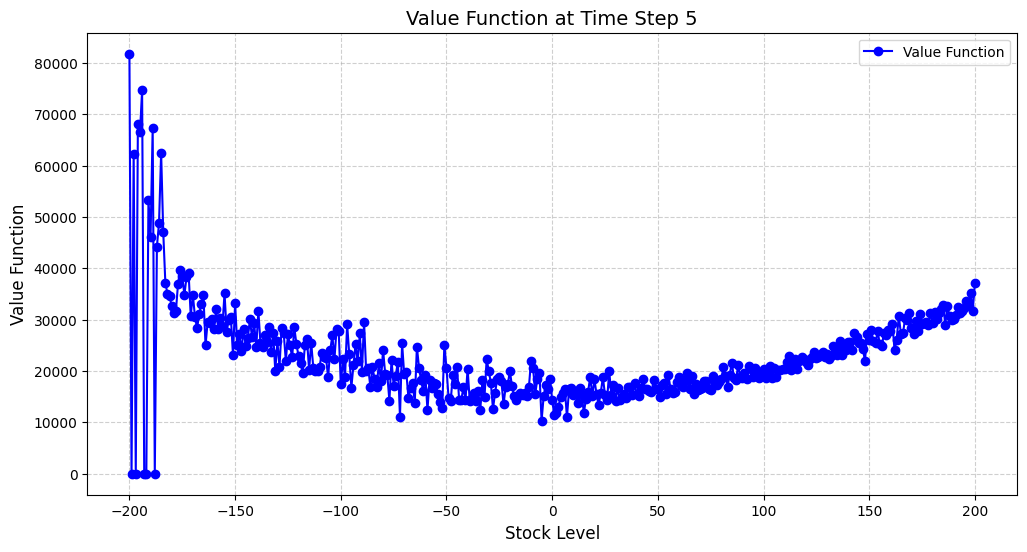

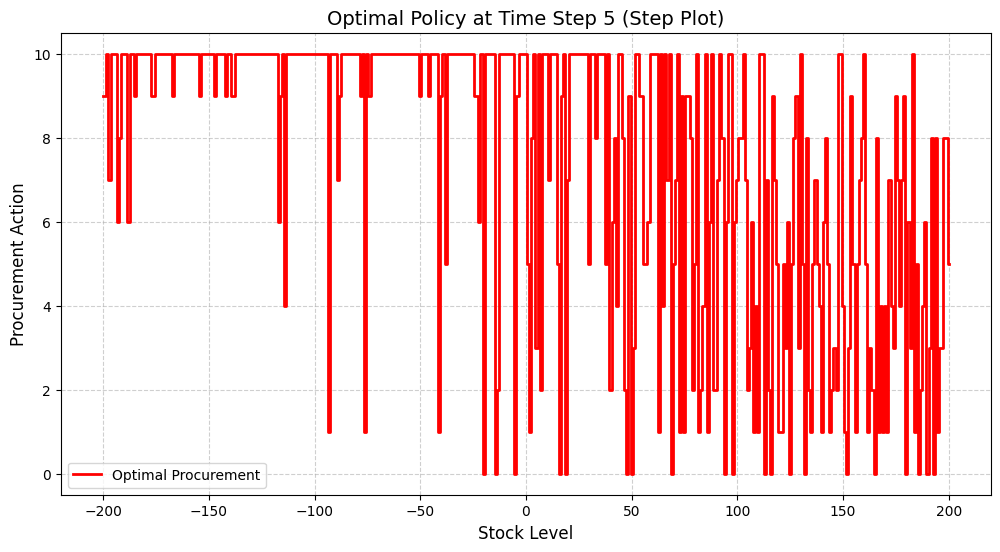

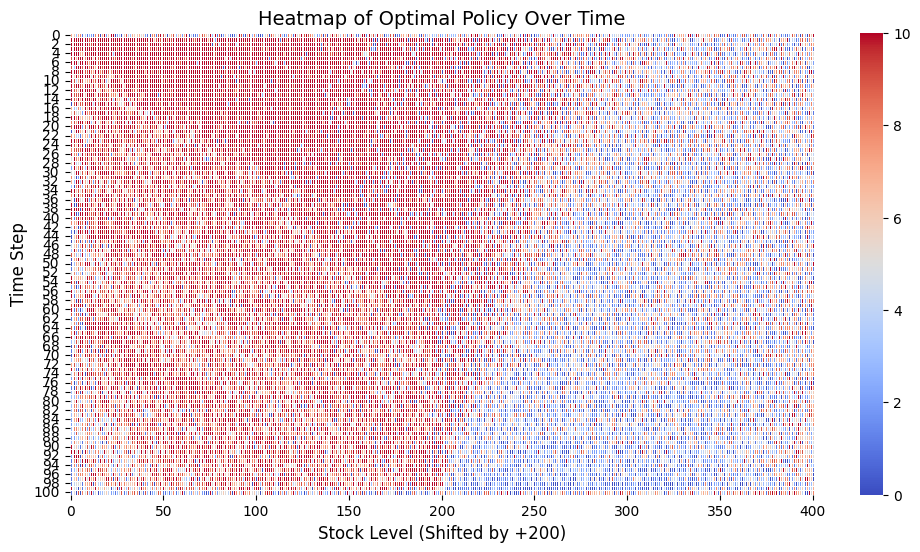

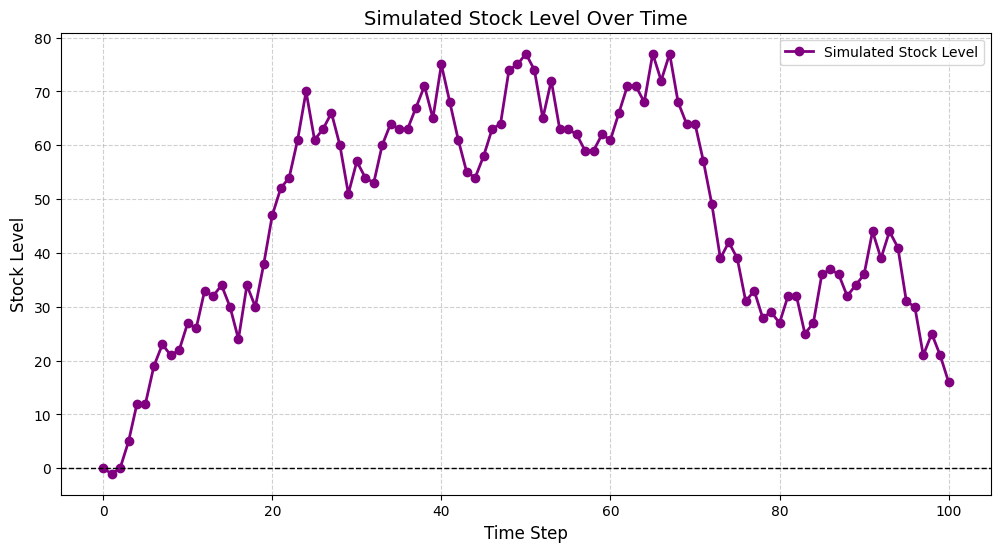

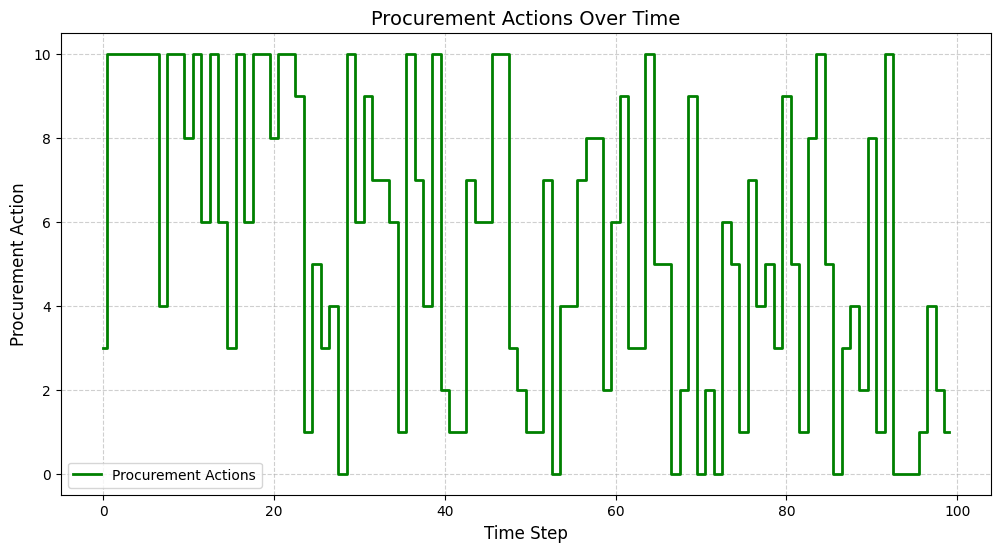

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated state and actions
X_sim = np.zeros(T+1, dtype=int)
U_sim = np.zeros(T, dtype=int)
W_sim = np.zeros(T, dtype=int)
X_sim[0] = 0  # Start from zero stock

for t in range(T):
    state_idx = np.clip(X_sim[t] + 200, 0, 400)
    U_sim[t] = policy[t, state_idx]
    W_sim[t] = sample_demand()
    X_sim[t+1] = X_sim[t] + U_sim[t] - W_sim[t]

# **1. Value Function Plot (Line + Markers)**
time_step = 5
stock_levels = np.arange(-200, 201)
value_function = np.min(Q[time_step], axis=1)

plt.figure(figsize=(12, 6))
plt.plot(stock_levels, value_function, label="Value Function", marker="o", linestyle="-", linewidth=1.5, color="blue")
plt.xlabel("Stock Level", fontsize=12)
plt.ylabel("Value Function", fontsize=12)
plt.title(f"Value Function at Time Step {time_step}", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

# **2. Step Plot for Optimal Policy**
plt.figure(figsize=(12, 6))
plt.step(stock_levels, policy[time_step], where="mid", color="red", linewidth=2, label="Optimal Procurement")
plt.xlabel("Stock Level", fontsize=12)
plt.ylabel("Procurement Action", fontsize=12)
plt.title(f"Optimal Policy at Time Step {time_step} (Step Plot)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

# **3. Heatmap of Policy Over Time**
plt.figure(figsize=(12, 6))
sns.heatmap(policy, cmap="coolwarm", cbar=True, xticklabels=50, yticklabels=2, linewidths=0.5)
plt.xlabel("Stock Level (Shifted by +200)", fontsize=12)
plt.ylabel("Time Step", fontsize=12)
plt.title("Heatmap of Optimal Policy Over Time", fontsize=14)
plt.show()

# **4. Simulated Stock Level Evolution**
plt.figure(figsize=(12, 6))
plt.plot(range(T+1), X_sim, marker="o", linestyle="-", linewidth=2, color="purple", label="Simulated Stock Level")
plt.xlabel("Time Step", fontsize=12)
plt.ylabel("Stock Level", fontsize=12)
plt.title("Simulated Stock Level Over Time", fontsize=14)
plt.axhline(0, color="black", linestyle="--", linewidth=1)  # Reference line for zero stock
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

# **5. Simulated Procurement Actions Over Time**
plt.figure(figsize=(12, 6))
plt.step(range(T), U_sim, where="mid", color="green", linewidth=2, label="Procurement Actions")
plt.xlabel("Time Step", fontsize=12)
plt.ylabel("Procurement Action", fontsize=12)
plt.title("Procurement Actions Over Time", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


## Getting the base stock policy and the random demand and order quantity

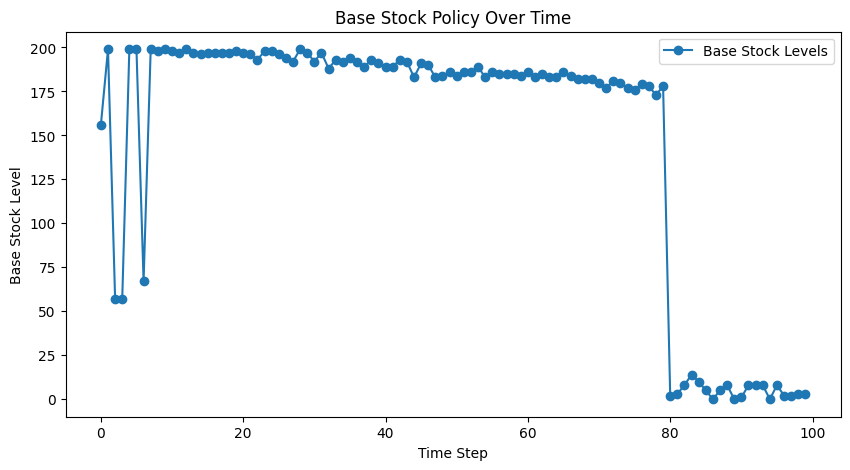

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 100  # Finite horizon
a, b = 2, 5  # Holding and backlog cost rates
p = 3  # Procurement cost per unit
U = 10  # Maximum procurement
num_episodes = 5000  # Number of Monte Carlo simulations
discount = 1.0  # No discounting
min_inventory, max_inventory = -200, 200

def sample_demand():
    return np.random.randint(0, 11)

def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Initialize policy arbitrarily
policy = np.random.randint(0, U+1, size=(T+1, 401))  # (time, stock levels from -200 to 200)
Q = np.zeros((T+1, 401, U+1))  # (time, stock levels, procurement actions)
returns = [[[] for _ in range(401)] for _ in range(T+1)]

# Monte Carlo Control Algorithm with Exploring Starts
for episode in range(num_episodes):
    X = np.zeros(T+1, dtype=int)
    U_values = np.zeros(T, dtype=int)
    W = np.zeros(T, dtype=int)
    rewards = np.zeros(T, dtype=float)
    
    X[0] = np.random.randint(-200, 201)
    U_values[0] = np.random.randint(0, U+1)
    
    for t in range(T):
        state_idx = np.clip(X[t] + 200, 0, 400)
        if t > 0:
            U_values[t] = policy[t, state_idx]
        W[t] = sample_demand()
        X[t+1] = X[t] + U_values[t] - W[t]
        rewards[t] = holding_cost(X[t+1]) + p * U_values[t]
    
    G = 0
    for t in reversed(range(T)):
        G = rewards[t] + G
        state_idx = np.clip(X[t] + 200, 0, 400)
        returns[t][state_idx].append(G)
        Q[t, state_idx, U_values[t]] = np.mean(returns[t][state_idx])
        policy[t, state_idx] = np.argmin(Q[t, state_idx])

# Compute base stock policy
def compute_base_stock_levels(V, time_steps, min_inventory, max_inventory, demand_values, holding_cost, price, s=0):
    num_states = max_inventory - min_inventory + 1
    base_stocks = []
    
    for t in range(time_steps):
        H_t = np.zeros(num_states)
        
        for zIndex in range(num_states):
            z = zIndex + min_inventory
            cost_sum = 0.0
            for w in demand_values:
                new_inventory = z - w
                new_inventory = max(min_inventory, min(new_inventory, max_inventory))
                new_index = new_inventory - min_inventory
                cost_sum += (1/len(demand_values)) * (holding_cost(new_inventory) + discount * np.min(V[t+1, new_index, :]))
            H_t[zIndex] = cost_sum
        
        best_cost = float('inf')
        best_z = None
        for zIndex in range(num_states):
            z = zIndex + min_inventory
            if z >= s:
                order_cost = price * (z - s)
                total_cost = order_cost + H_t[zIndex]
                if total_cost < best_cost:
                    best_cost = total_cost
                    best_z = z
        base_stocks.append(best_z)
    return base_stocks

base_stock_levels = compute_base_stock_levels(Q, T, min_inventory, max_inventory, list(range(11)), holding_cost, p)

# Plot base stock policy
plt.figure(figsize=(10, 5))
plt.plot(range(T), base_stock_levels, marker="o", label="Base Stock Levels")
plt.xlabel("Time Step")
plt.ylabel("Base Stock Level")
plt.title("Base Stock Policy Over Time")
plt.legend()
plt.show()


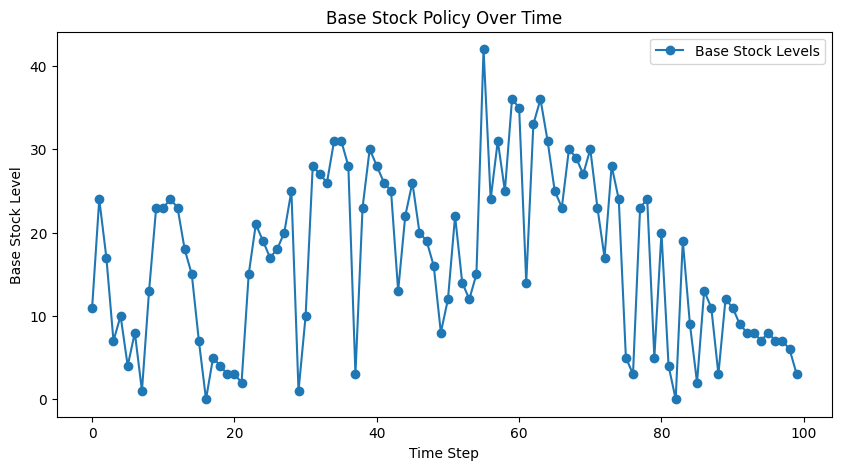

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 100  # Finite horizon
a, b = 2, 5  # Holding and backlog cost rates
p = 3  # Procurement cost per unit
U = 10  # Maximum procurement
num_episodes = 15000  # Number of Monte Carlo simulations
discount = 1.0  # No discounting
min_inventory, max_inventory = -200, 200

def sample_demand():
    return np.random.randint(0, 11)

def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Initialize policy arbitrarily
policy = np.random.randint(0, U+1, size=(T+1, 401))  # (time, stock levels from -200 to 200)
Q = np.zeros((T+1, 401, U+1))  # (time, stock levels, procurement actions)
returns = [[[] for _ in range(401)] for _ in range(T+1)]

# Monte Carlo Control Algorithm with Exploring Starts
for episode in range(num_episodes):
    X = np.zeros(T+1, dtype=int)
    U_values = np.zeros(T, dtype=int)
    W = np.zeros(T, dtype=int)
    rewards = np.zeros(T, dtype=float)
    
    X[0] = np.random.randint(-200, 201)
    U_values[0] = np.random.randint(0, U+1)
    
    for t in range(T):
        state_idx = np.clip(X[t] + 200, 0, 400)
        if t > 0:
            U_values[t] = policy[t, state_idx]
        W[t] = sample_demand()
        X[t+1] = X[t] + U_values[t] - W[t]
        rewards[t] = holding_cost(X[t+1]) + p * U_values[t]
    
    G = 0
    for t in reversed(range(T)):
        G = rewards[t] + G
        state_idx = np.clip(X[t] + 200, 0, 400)
        returns[t][state_idx].append(G)
        Q[t, state_idx, U_values[t]] = np.mean(returns[t][state_idx])
        policy[t, state_idx] = np.argmin(Q[t, state_idx])

# Compute base stock policy
def compute_base_stock_levels(V, time_steps, min_inventory, max_inventory, demand_values, holding_cost, price, s=0):
    num_states = max_inventory - min_inventory + 1
    base_stocks = []
    
    for t in range(time_steps):
        H_t = np.zeros(num_states)
        
        for zIndex in range(num_states):
            z = zIndex + min_inventory
            cost_sum = 0.0
            for w in demand_values:
                new_inventory = z - w
                new_inventory = max(min_inventory, min(new_inventory, max_inventory))
                new_index = new_inventory - min_inventory
                cost_sum += (1/len(demand_values)) * (holding_cost(new_inventory) + discount * np.min(V[t+1, new_index, :]))
            H_t[zIndex] = cost_sum
        
        best_cost = float('inf')
        best_z = None
        for zIndex in range(num_states):
            z = zIndex + min_inventory
            if z >= s:
                order_cost = price * (z - s)
                total_cost = order_cost + H_t[zIndex]
                if total_cost < best_cost:
                    best_cost = total_cost
                    best_z = z
        base_stocks.append(best_z)
    return base_stocks

base_stock_levels = compute_base_stock_levels(Q, T, min_inventory, max_inventory, list(range(11)), holding_cost, p)

# Plot base stock policy
plt.figure(figsize=(10, 5))
plt.plot(range(T), base_stock_levels, marker="o", label="Base Stock Levels")
plt.xlabel("Time Step")
plt.ylabel("Base Stock Level")
plt.title("Base Stock Policy Over Time")
plt.legend()
plt.show()


## Plotting the instantaneous and cumulative regret

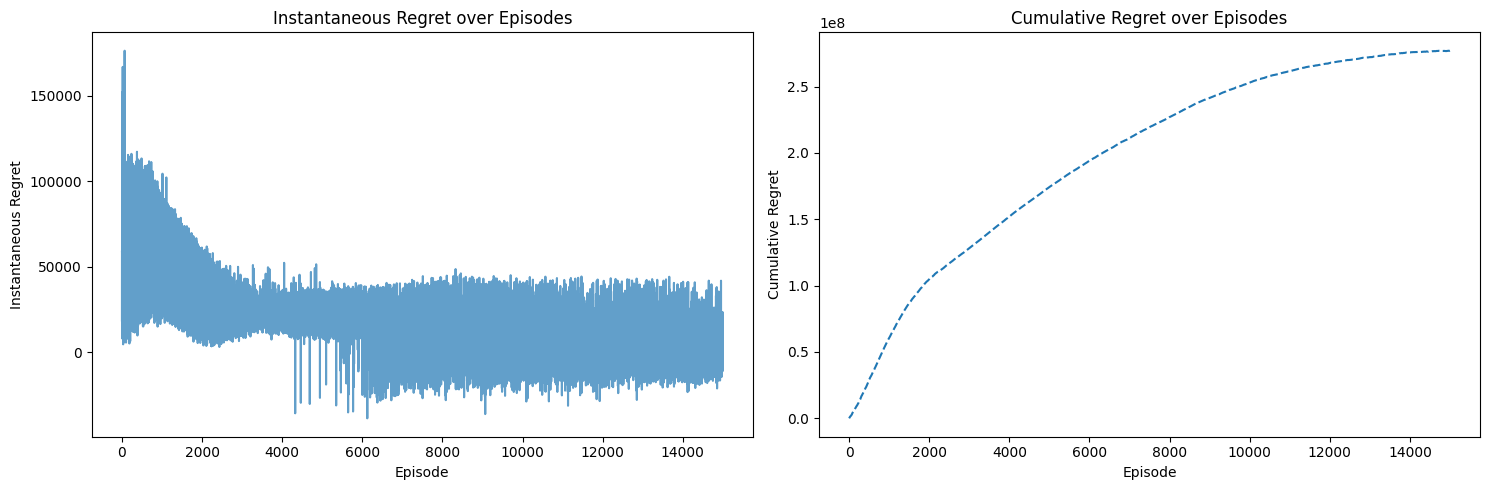

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 100  # Finite horizon
a, b = 2, 5  # Holding and backlog cost rates
p = 3  # Procurement cost per unit
U = 10  # Maximum procurement
num_episodes = 15000  # Number of Monte Carlo simulations
discount = 1.0  # No discounting
min_inventory, max_inventory = -200, 200

def sample_demand():
    return np.random.randint(0, 11)

def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Initialize policy arbitrarily
policy = np.random.randint(0, U+1, size=(T+1, 401))  # (time, stock levels from -200 to 200)
Q = np.zeros((T+1, 401, U+1))  # (time, stock levels, procurement actions)
returns = [[[] for _ in range(401)] for _ in range(T+1)]

instantaneous_regret = []
cumulative_regret = []

# Monte Carlo Control Algorithm with Exploring Starts

for episode in range(num_episodes):
    X = np.zeros(T+1, dtype=int)
    U_values = np.zeros(T, dtype=int)
    W = np.zeros(T, dtype=int)
    rewards = np.zeros(T, dtype=float)
    
    X[0] = np.random.randint(-200, 201)
    U_values[0] = np.random.randint(0, U+1)
    
    for t in range(T):
        state_idx = np.clip(X[t] + 200, 0, 400)
        if t > 0:
            U_values[t] = policy[t, state_idx]
        W[t] = sample_demand()
        X[t+1] = X[t] + U_values[t] - W[t]
        rewards[t] = holding_cost(X[t+1]) + p * U_values[t]
    
    G = 0
    for t in reversed(range(T)):
        G = rewards[t] + G
        state_idx = np.clip(X[t] + 200, 0, 400)
        returns[t][state_idx].append(G)
        Q[t, state_idx, U_values[t]] = np.mean(returns[t][state_idx])
        policy[t, state_idx] = np.argmin(Q[t, state_idx])

    optimal_G = np.min(Q[0, np.clip(X[0] + 200, 0, 400), :])
    regret = -optimal_G + G
    instantaneous_regret.append(regret)
    cumulative_regret.append(sum(instantaneous_regret))

# Compute base stock policy
def compute_base_stock_levels(V, time_steps, min_inventory, max_inventory, demand_values, holding_cost, price, s=0):
    num_states = max_inventory - min_inventory + 1
    base_stocks = []
    
    for t in range(time_steps):
        H_t = np.zeros(num_states)
        
        for zIndex in range(num_states):
            z = zIndex + min_inventory
            cost_sum = 0.0
            for w in demand_values:
                new_inventory = z - w
                new_inventory = max(min_inventory, min(new_inventory, max_inventory))
                new_index = new_inventory - min_inventory
                cost_sum += (1/len(demand_values)) * (holding_cost(new_inventory) + discount * np.min(V[t+1, new_index, :]))
            H_t[zIndex] = cost_sum
        
        best_cost = float('inf')
        best_z = None
        for zIndex in range(num_states):
            z = zIndex + min_inventory
            if z >= s:
                order_cost = price * (z - s)
                total_cost = order_cost + H_t[zIndex]
                if total_cost < best_cost:
                    best_cost = total_cost
                    best_z = z
        base_stocks.append(best_z)
    return base_stocks


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot instantaneous regret on the first subplot
axs[0].plot(range(num_episodes), instantaneous_regret, alpha=0.7)
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Instantaneous Regret")
axs[0].set_title("Instantaneous Regret over Episodes")

# Plot cumulative regret on the second subplot
axs[1].plot(range(num_episodes), cumulative_regret, linestyle='dashed')
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Cumulative Regret")
axs[1].set_title("Cumulative Regret over Episodes")

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

## For fewer episodes

[95350.0, 34453.0, 33352.0, 35419.0, 147564.0, 5382.0, 10067.0, 31325.0, 26820.0, 75219.0, 34361.0, 9006.0, 69461.0, 21231.0, 161635.0, 71675.0, 7026.0, 63311.0, 33824.0, 28594.0, 23434.0, 33936.0, 63808.0, 13861.0, 76316.0, 82397.0, 9175.0, 25139.0, 70122.0, 42488.0, 31337.0, 25258.0, 7441.0, 37836.0, 7170.0, 15887.0, 14556.0, 12598.0, 17557.0, 19890.0, 75975.0, 10923.0, 31719.0, 15269.0, 24658.0, 162242.0, 14807.0, 18387.0, 23670.0, 23327.0, 85172.0, 33854.0, 10373.0, 12790.0, 49860.0, 19622.0, 9606.0, 20165.0, 30750.0, 115822.0, 65594.0, 54121.0, 30774.0, 7078.0, 30325.0, 79767.0, 29783.0, 44842.0, 8756.0, 37851.0, 153778.0, 29488.0, 46484.0, 46717.0, 17049.0, 42248.0, 18049.0, 28859.0, 36538.0, 30239.0, 58238.0, 30460.0, 5255.0, 87439.0, 23030.0, 78760.0, 27851.0, 78067.0, 27037.0, 54562.0, 101962.0, 84491.0, 42752.0, 91273.0, 11182.0, 84175.0, 29032.0, 12672.0, 30113.0, 28463.0, 17505.0, 101145.0, 32771.0, 62742.0, 36949.0, 20036.0, 42330.0, 31993.0, 22602.0, 89893.0, 38545.0, 296

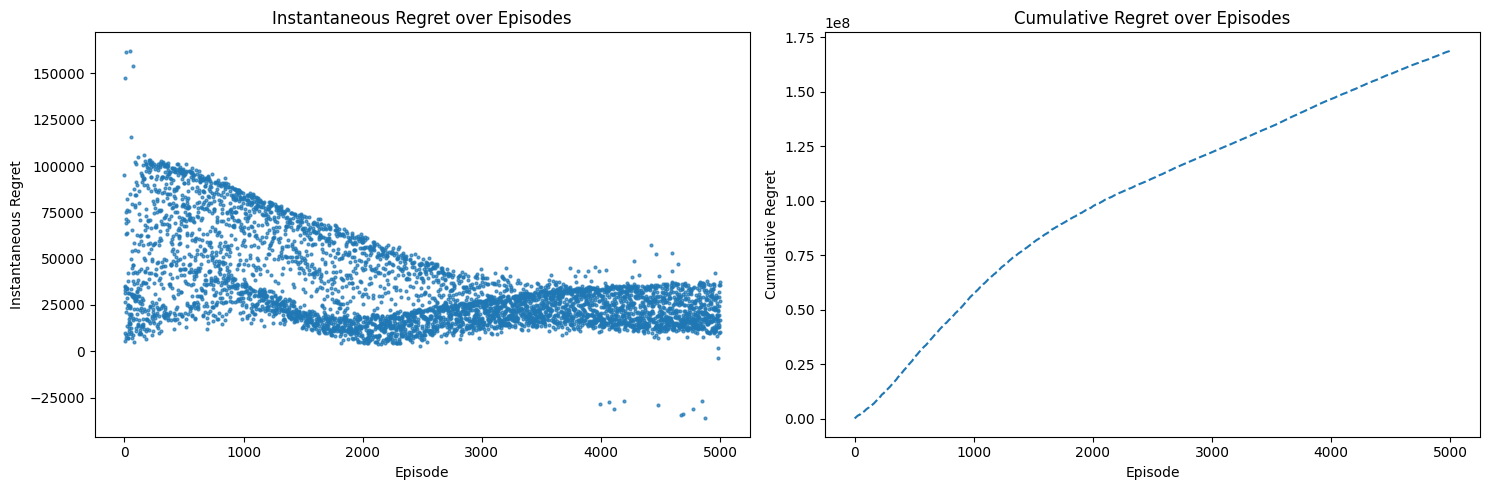

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 100  # Finite horizon
a, b = 2, 5  # Holding and backlog cost rates
p = 3  # Procurement cost per unit
U = 10  # Maximum procurement
num_episodes = 5000  # Number of Monte Carlo simulations
discount = 1.0  # No discounting
min_inventory, max_inventory = -200, 200

def sample_demand():
    return np.random.randint(0, 11)

def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Initialize policy arbitrarily
policy = np.random.randint(0, U+1, size=(T+1, 401))  # (time, stock levels from -200 to 200)
Q = np.zeros((T+1, 401, U+1))  # (time, stock levels, procurement actions)
returns = [[[] for _ in range(401)] for _ in range(T+1)]

instantaneous_regret = []
cumulative_regret = []

# Monte Carlo Control Algorithm with Exploring Starts

for episode in range(num_episodes):
    X = np.zeros(T+1, dtype=int)
    U_values = np.zeros(T, dtype=int)
    W = np.zeros(T, dtype=int)
    rewards = np.zeros(T, dtype=float)
    
    X[0] = np.random.randint(-200, 201)
    U_values[0] = np.random.randint(0, U+1)
    
    for t in range(T):
        state_idx = np.clip(X[t] + 200, 0, 400)
        if t > 0:
            U_values[t] = policy[t, state_idx]
        W[t] = sample_demand()
        X[t+1] = X[t] + U_values[t] - W[t]
        rewards[t] = holding_cost(X[t+1]) + p * U_values[t]
    
    G = 0
    for t in reversed(range(T)):
        G = rewards[t] + G
        state_idx = np.clip(X[t] + 200, 0, 400)
        returns[t][state_idx].append(G)
        Q[t, state_idx, U_values[t]] = np.mean(returns[t][state_idx])
        policy[t, state_idx] = np.argmin(Q[t, state_idx])

    optimal_G = np.min(Q[0, np.clip(X[0] + 200, 0, 400), :])
    regret = -optimal_G + G
    instantaneous_regret.append(regret)
    cumulative_regret.append(sum(instantaneous_regret))

# Compute base stock policy
def compute_base_stock_levels(V, time_steps, min_inventory, max_inventory, demand_values, holding_cost, price, s=0):
    num_states = max_inventory - min_inventory + 1
    base_stocks = []
    
    for t in range(time_steps):
        H_t = np.zeros(num_states)
        
        for zIndex in range(num_states):
            z = zIndex + min_inventory
            cost_sum = 0.0
            for w in demand_values:
                new_inventory = z - w
                new_inventory = max(min_inventory, min(new_inventory, max_inventory))
                new_index = new_inventory - min_inventory
                cost_sum += (1/len(demand_values)) * (holding_cost(new_inventory) + discount * np.min(V[t+1, new_index, :]))
            H_t[zIndex] = cost_sum
        
        best_cost = float('inf')
        best_z = None
        for zIndex in range(num_states):
            z = zIndex + min_inventory
            if z >= s:
                order_cost = price * (z - s)
                total_cost = order_cost + H_t[zIndex]
                if total_cost < best_cost:
                    best_cost = total_cost
                    best_z = z
        base_stocks.append(best_z)
    return base_stocks


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

print(instantaneous_regret)

# Plot instantaneous regret on the first subplot
axs[0].scatter(range(num_episodes), instantaneous_regret, alpha=0.7, s=4)
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Instantaneous Regret")
axs[0].set_title("Instantaneous Regret over Episodes")

# Plot cumulative regret on the second subplot
axs[1].plot(range(num_episodes), cumulative_regret, linestyle='dashed')
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Cumulative Regret")
axs[1].set_title("Cumulative Regret over Episodes")

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

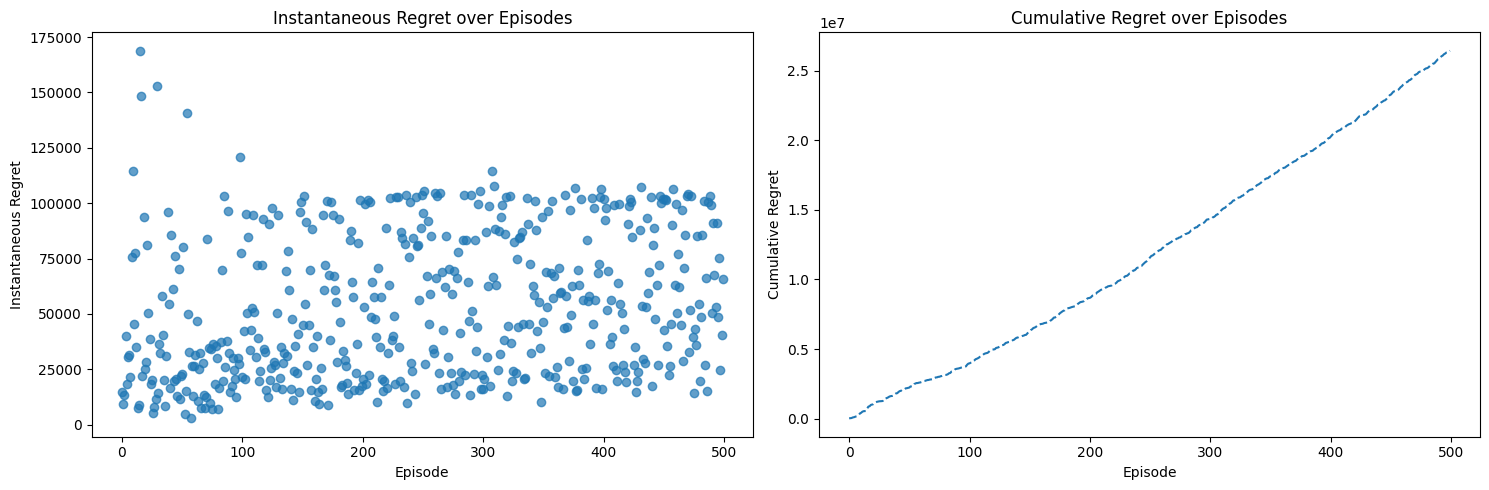

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 100  # Finite horizon
a, b = 2, 5  # Holding and backlog cost rates
p = 3  # Procurement cost per unit
U = 10  # Maximum procurement
num_episodes = 500  # Number of Monte Carlo simulations
discount = 1.0  # No discounting
min_inventory, max_inventory = -200, 200

def sample_demand():
    return np.random.randint(0, 11)

def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Initialize policy arbitrarily
policy = np.random.randint(0, U+1, size=(T+1, 401))  # (time, stock levels from -200 to 200)
Q = np.zeros((T+1, 401, U+1))  # (time, stock levels, procurement actions)
returns = [[[] for _ in range(401)] for _ in range(T+1)]

instantaneous_regret = []
cumulative_regret = []

# Monte Carlo Control Algorithm with Exploring Starts

for episode in range(num_episodes):
    X = np.zeros(T+1, dtype=int)
    U_values = np.zeros(T, dtype=int)
    W = np.zeros(T, dtype=int)
    rewards = np.zeros(T, dtype=float)
    
    X[0] = np.random.randint(-200, 201)
    U_values[0] = np.random.randint(0, U+1)
    
    for t in range(T):
        state_idx = np.clip(X[t] + 200, 0, 400)
        if t > 0:
            U_values[t] = policy[t, state_idx]
        W[t] = sample_demand()
        X[t+1] = X[t] + U_values[t] - W[t]
        rewards[t] = holding_cost(X[t+1]) + p * U_values[t]
    
    G = 0
    for t in reversed(range(T)):
        G = rewards[t] + G
        state_idx = np.clip(X[t] + 200, 0, 400)
        returns[t][state_idx].append(G)
        Q[t, state_idx, U_values[t]] = np.mean(returns[t][state_idx])
        policy[t, state_idx] = np.argmin(Q[t, state_idx])

    optimal_G = np.min(Q[0, np.clip(X[0] + 200, 0, 400), :])
    regret = -optimal_G + G
    instantaneous_regret.append(regret)
    cumulative_regret.append(sum(instantaneous_regret))

# Compute base stock policy
def compute_base_stock_levels(V, time_steps, min_inventory, max_inventory, demand_values, holding_cost, price, s=0):
    num_states = max_inventory - min_inventory + 1
    base_stocks = []
    
    for t in range(time_steps):
        H_t = np.zeros(num_states)
        
        for zIndex in range(num_states):
            z = zIndex + min_inventory
            cost_sum = 0.0
            for w in demand_values:
                new_inventory = z - w
                new_inventory = max(min_inventory, min(new_inventory, max_inventory))
                new_index = new_inventory - min_inventory
                cost_sum += (1/len(demand_values)) * (holding_cost(new_inventory) + discount * np.min(V[t+1, new_index, :]))
            H_t[zIndex] = cost_sum
        
        best_cost = float('inf')
        best_z = None
        for zIndex in range(num_states):
            z = zIndex + min_inventory
            if z >= s:
                order_cost = price * (z - s)
                total_cost = order_cost + H_t[zIndex]
                if total_cost < best_cost:
                    best_cost = total_cost
                    best_z = z
        base_stocks.append(best_z)
    return base_stocks


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot instantaneous regret on the first subplot
axs[0].scatter(range(num_episodes), instantaneous_regret, alpha=0.7)
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Instantaneous Regret")
axs[0].set_title("Instantaneous Regret over Episodes")

# Plot cumulative regret on the second subplot
axs[1].plot(range(num_episodes), cumulative_regret, linestyle='dashed')
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Cumulative Regret")
axs[1].set_title("Cumulative Regret over Episodes")

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

## For lot more episodes

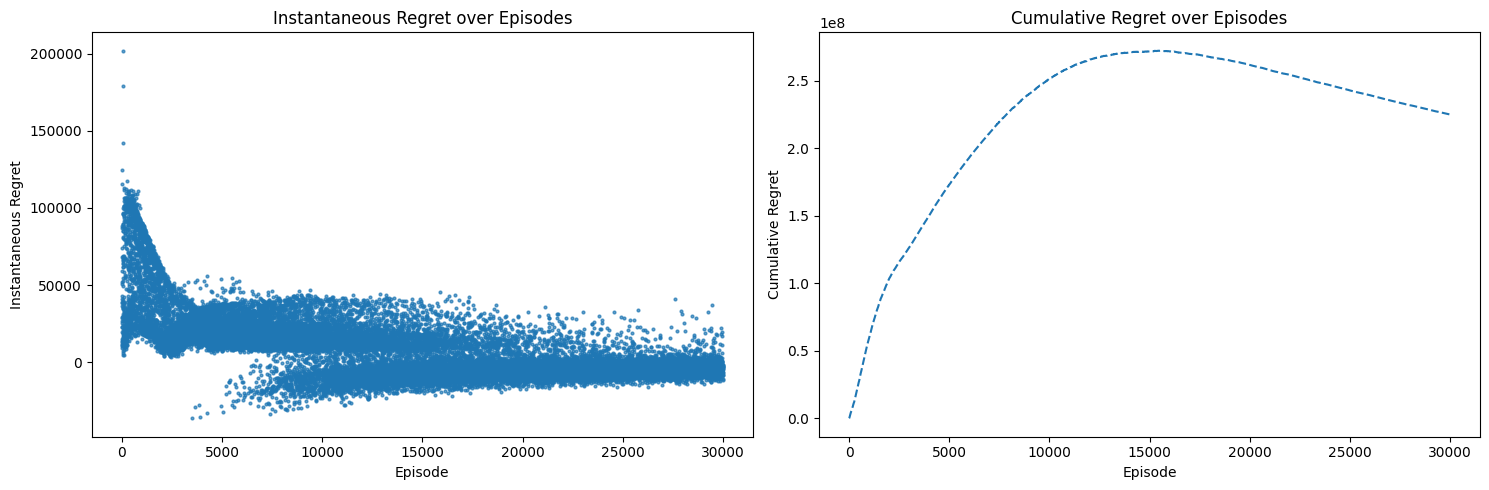

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 100  # Finite horizon
a, b = 2, 5  # Holding and backlog cost rates
p = 3  # Procurement cost per unit
U = 10  # Maximum procurement
num_episodes = 30000  # Number of Monte Carlo simulations
discount = 1.0  # No discounting
min_inventory, max_inventory = -200, 200

def sample_demand():
    return np.random.randint(0, 11)

def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Initialize policy arbitrarily
policy = np.random.randint(0, U+1, size=(T+1, 401))  # (time, stock levels from -200 to 200)
Q = np.zeros((T+1, 401, U+1))  # (time, stock levels, procurement actions)
returns = [[[] for _ in range(401)] for _ in range(T+1)]

instantaneous_regret = []
cumulative_regret = []

# Monte Carlo Control Algorithm with Exploring Starts

for episode in range(num_episodes):
    X = np.zeros(T+1, dtype=int)
    U_values = np.zeros(T, dtype=int)
    W = np.zeros(T, dtype=int)
    rewards = np.zeros(T, dtype=float)
    
    X[0] = np.random.randint(-200, 201)
    U_values[0] = np.random.randint(0, U+1)
    
    for t in range(T):
        state_idx = np.clip(X[t] + 200, 0, 400)
        if t > 0:
            U_values[t] = policy[t, state_idx]
        W[t] = sample_demand()
        X[t+1] = X[t] + U_values[t] - W[t]
        rewards[t] = holding_cost(X[t+1]) + p * U_values[t]
    
    G = 0
    for t in reversed(range(T)):
        G = rewards[t] + G
        state_idx = np.clip(X[t] + 200, 0, 400)
        returns[t][state_idx].append(G)
        Q[t, state_idx, U_values[t]] = np.mean(returns[t][state_idx])
        policy[t, state_idx] = np.argmin(Q[t, state_idx])

    optimal_G = np.min(Q[0, np.clip(X[0] + 200, 0, 400), :])
    regret = -optimal_G + G
    instantaneous_regret.append(regret)
    cumulative_regret.append(sum(instantaneous_regret))

# Compute base stock policy
def compute_base_stock_levels(V, time_steps, min_inventory, max_inventory, demand_values, holding_cost, price, s=0):
    num_states = max_inventory - min_inventory + 1
    base_stocks = []
    
    for t in range(time_steps):
        H_t = np.zeros(num_states)
        
        for zIndex in range(num_states):
            z = zIndex + min_inventory
            cost_sum = 0.0
            for w in demand_values:
                new_inventory = z - w
                new_inventory = max(min_inventory, min(new_inventory, max_inventory))
                new_index = new_inventory - min_inventory
                cost_sum += (1/len(demand_values)) * (holding_cost(new_inventory) + discount * np.min(V[t+1, new_index, :]))
            H_t[zIndex] = cost_sum
        
        best_cost = float('inf')
        best_z = None
        for zIndex in range(num_states):
            z = zIndex + min_inventory
            if z >= s:
                order_cost = price * (z - s)
                total_cost = order_cost + H_t[zIndex]
                if total_cost < best_cost:
                    best_cost = total_cost
                    best_z = z
        base_stocks.append(best_z)
    return base_stocks


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot instantaneous regret on the first subplot
axs[0].scatter(range(num_episodes), instantaneous_regret, alpha=0.7, s=4)
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Instantaneous Regret")
axs[0].set_title("Instantaneous Regret over Episodes")

# Plot cumulative regret on the second subplot
axs[1].plot(range(num_episodes), cumulative_regret, linestyle='dashed')
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Cumulative Regret")
axs[1].set_title("Cumulative Regret over Episodes")

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

## Clipping the values so it looks more presentable 

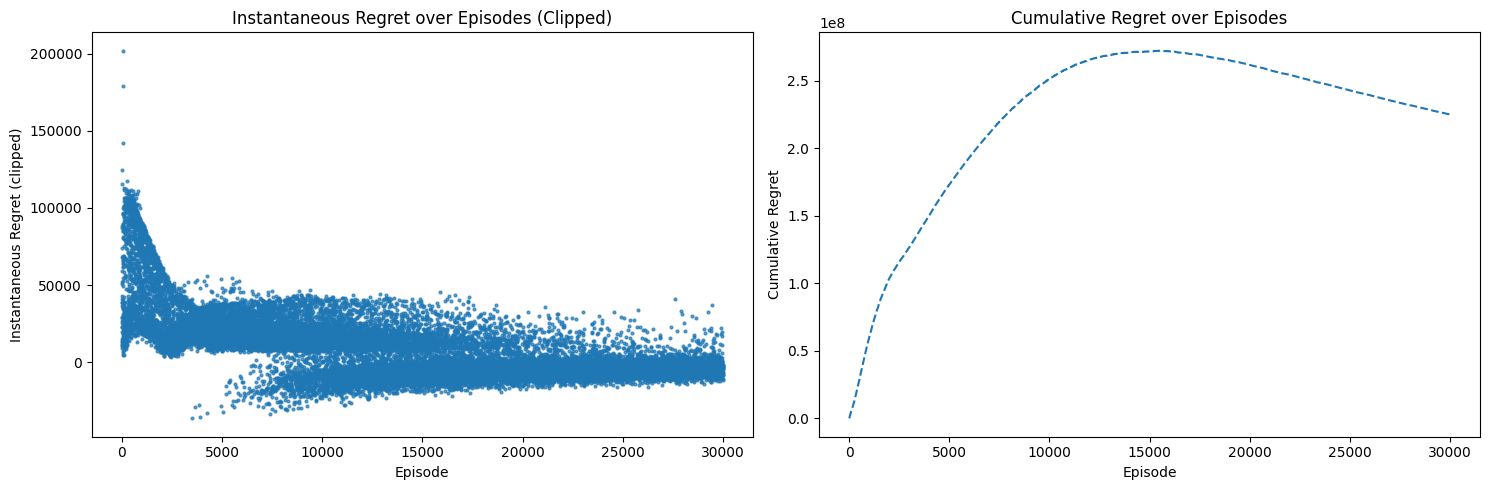

In [7]:
# Create a clipped version of instantaneous regret
instantaneous_regret_clipped = np.clip(instantaneous_regret, a_min=0, a_max=None)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot clipped instantaneous regret
axs[0].scatter(range(num_episodes), instantaneous_regret, alpha=0.7, s=4)
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Instantaneous Regret (clipped)")
axs[0].set_title("Instantaneous Regret over Episodes (Clipped)")

# Plot cumulative regret (unchanged)
axs[1].plot(range(num_episodes), cumulative_regret, linestyle='dashed')
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Cumulative Regret")
axs[1].set_title("Cumulative Regret over Episodes")

fig.tight_layout()
plt.show()

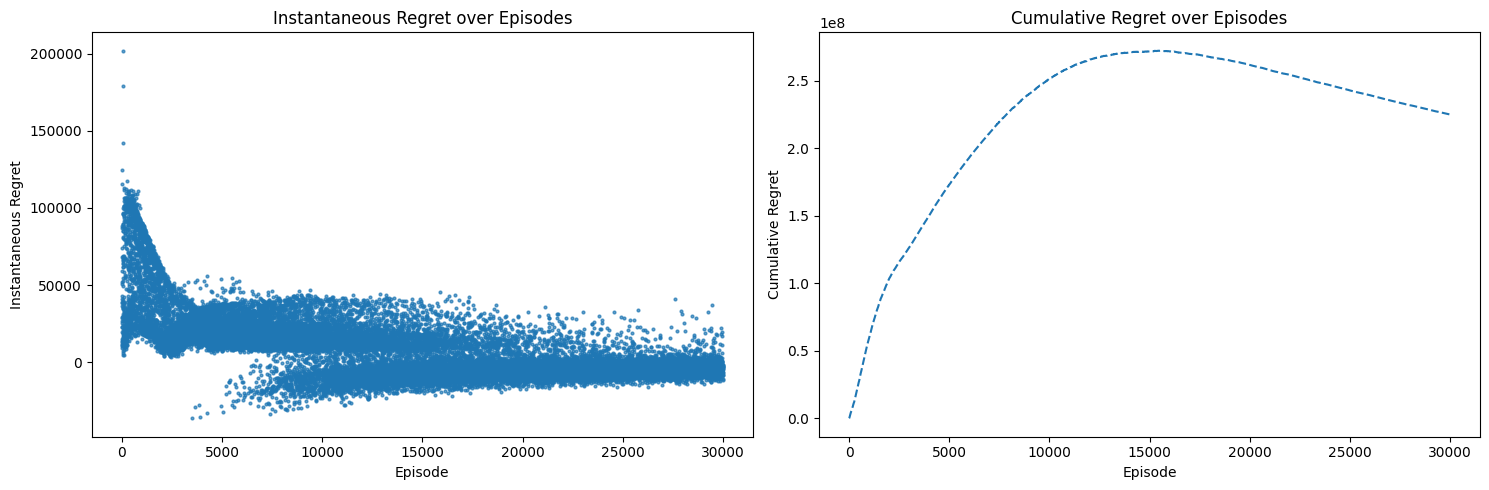

In [8]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot instantaneous regret on the first subplot
axs[0].scatter(range(num_episodes), instantaneous_regret, alpha=0.7, s=4)
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Instantaneous Regret")
axs[0].set_title("Instantaneous Regret over Episodes")

# Plot cumulative regret on the second subplot
axs[1].plot(range(num_episodes), cumulative_regret, linestyle='dashed')
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Cumulative Regret")
axs[1].set_title("Cumulative Regret over Episodes")

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

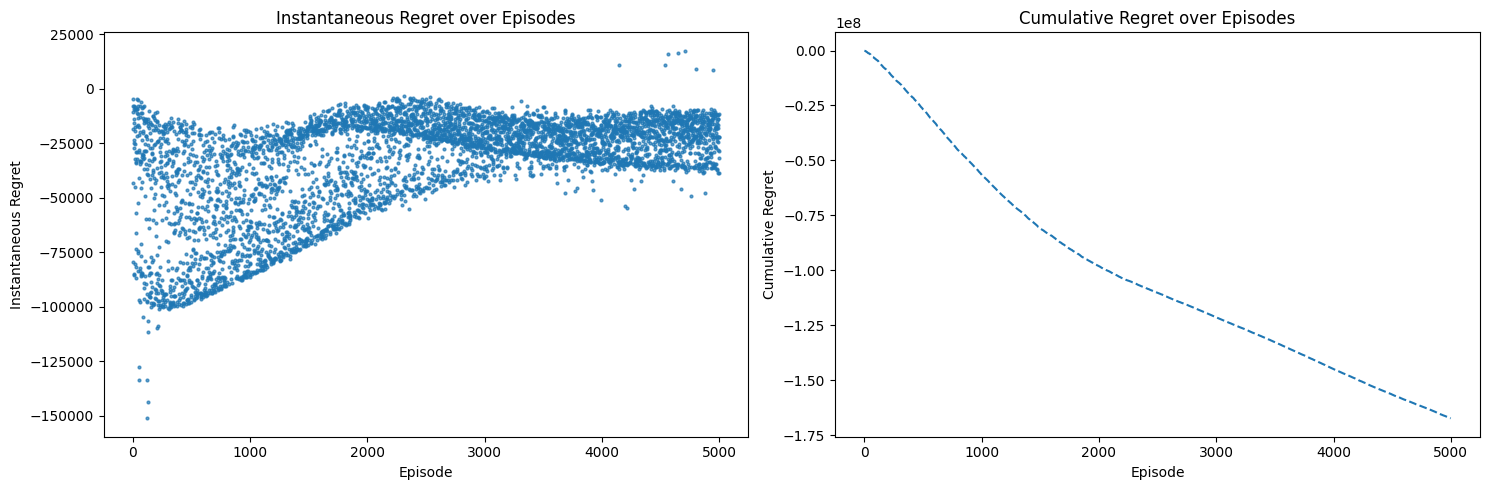

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 100  # Finite horizon
a, b = 2, 5  # Holding and backlog cost rates
p = 3  # Procurement cost per unit
U = 10  # Maximum procurement
num_episodes = 5000 # Number of Monte Carlo simulations
discount = 1.0  # No discounting
min_inventory, max_inventory = -200, 200

def sample_demand():
    return np.random.randint(0, 11)

def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Initialize policy arbitrarily
policy = np.random.randint(0, U+1, size=(T+1, 401))  # (time, stock levels from -200 to 200)
Q = np.zeros((T+1, 401, U+1))  # (time, stock levels, procurement actions)
returns = [[[] for _ in range(401)] for _ in range(T+1)]

instantaneous_regret = []
cumulative_regret = []

# Monte Carlo Control Algorithm with Exploring Starts
for episode in range(num_episodes):
    X = np.zeros(T+1, dtype=int)
    U_values = np.zeros(T, dtype=int)
    W = np.zeros(T, dtype=int)
    rewards = np.zeros(T, dtype=float)
    
    X[0] = np.random.randint(-200, 201)
    U_values[0] = np.random.randint(0, U+1)
    
    for t in range(T):
        state_idx = np.clip(X[t] + 200, 0, 400)
        if t > 0:
            U_values[t] = policy[t, state_idx]
        W[t] = sample_demand()
        X[t+1] = X[t] + U_values[t] - W[t]
        rewards[t] = holding_cost(X[t+1]) + p * U_values[t]
    
    G = 0
    optimal_G = np.min(Q[0, np.clip(X[0] + 200, 0, 400), :])
    for t in reversed(range(T)):
        G = rewards[t] + G
        state_idx = np.clip(X[t] + 200, 0, 400)
        returns[t][state_idx].append(G)
        Q[t, state_idx, U_values[t]] = np.mean(returns[t][state_idx])
        policy[t, state_idx] = np.argmin(Q[t, state_idx])
    
    regret = optimal_G - G
    instantaneous_regret.append(regret)
    cumulative_regret.append(sum(instantaneous_regret))

# Compute base stock policy
def compute_base_stock_levels(V, time_steps, min_inventory, max_inventory, demand_values, holding_cost, price, s=0):
    num_states = max_inventory - min_inventory + 1
    base_stocks = []
    
    for t in range(time_steps):
        H_t = np.zeros(num_states)
        
        for zIndex in range(num_states):
            z = zIndex + min_inventory
            cost_sum = 0.0
            for w in demand_values:
                new_inventory = z - w
                new_inventory = max(min_inventory, min(new_inventory, max_inventory))
                new_index = new_inventory - min_inventory
                cost_sum += (1/len(demand_values)) * (holding_cost(new_inventory) + discount * np.min(V[t+1, new_index, :]))
            H_t[zIndex] = cost_sum
        
        best_cost = float('inf')
        best_z = None
        for zIndex in range(num_states):
            z = zIndex + min_inventory
            if z >= s:
                order_cost = price * (z - s)
                total_cost = order_cost + H_t[zIndex]
                if total_cost < best_cost:
                    best_cost = total_cost
                    best_z = z
        base_stocks.append(best_z)
    return base_stocks


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot instantaneous regret on the first subplot
axs[0].scatter(range(num_episodes), instantaneous_regret, alpha=0.7, s=4)
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Instantaneous Regret")
axs[0].set_title("Instantaneous Regret over Episodes")

# Plot cumulative regret on the second subplot
axs[1].plot(range(num_episodes), cumulative_regret, linestyle='dashed')
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Cumulative Regret")
axs[1].set_title("Cumulative Regret over Episodes")

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

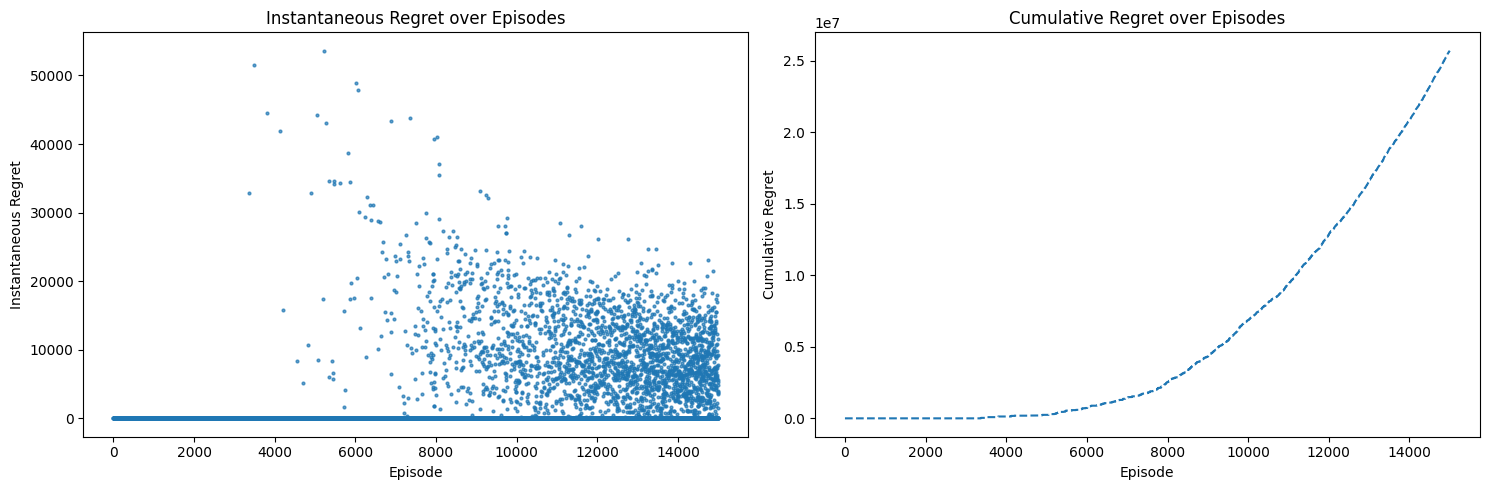

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 100  # Finite horizon
a, b = 2, 5  # Holding and backlog cost rates
p = 3  # Procurement cost per unit
U = 10  # Maximum procurement
num_episodes = 15000  # Number of Monte Carlo simulations
discount = 1.0  # No discounting
min_inventory, max_inventory = -200, 200

def sample_demand():
    return np.random.randint(0, 11)

def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Initialize policy arbitrarily
policy = np.random.randint(0, U+1, size=(T+1, 401))  # (time, stock levels from -200 to 200)
Q = np.zeros((T+1, 401, U+1))  # (time, stock levels, procurement actions)
returns = [[[] for _ in range(401)] for _ in range(T+1)]

instantaneous_regret = []
cumulative_regret = []
cumulative_sum_regret = 0

# Monte Carlo Control Algorithm with Exploring Starts
for episode in range(num_episodes):
    X = np.zeros(T+1, dtype=int)
    U_values = np.zeros(T, dtype=int)
    W = np.zeros(T, dtype=int)
    rewards = np.zeros(T, dtype=float)
    
    X[0] = np.random.randint(-200, 201)
    U_values[0] = np.random.randint(0, U+1)
    
    for t in range(T):
        state_idx = np.clip(X[t] + 200, 0, 400)
        if t > 0:
            U_values[t] = policy[t, state_idx]
        W[t] = sample_demand()
        X[t+1] = X[t] + U_values[t] - W[t]
        rewards[t] = holding_cost(X[t+1]) + p * U_values[t]
    
    G = 0
    optimal_G = np.min(Q[0, np.clip(X[0] + 200, 0, 400), :])
    for t in reversed(range(T)):
        G = rewards[t] + G
        state_idx = np.clip(X[t] + 200, 0, 400)
        returns[t][state_idx].append(G)
        Q[t, state_idx, U_values[t]] = np.mean(returns[t][state_idx])
        policy[t, state_idx] = np.argmin(Q[t, state_idx])
    
    regret = max(0, optimal_G - G)  # Ensure regret is non-negative
    instantaneous_regret.append(regret)
    cumulative_sum_regret += regret
    cumulative_regret.append(cumulative_sum_regret)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot instantaneous regret on the first subplot
axs[0].scatter(range(num_episodes), instantaneous_regret, alpha=0.7, s=4)
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Instantaneous Regret")
axs[0].set_title("Instantaneous Regret over Episodes")

# Plot cumulative regret on the second subplot
axs[1].plot(range(num_episodes), cumulative_regret, linestyle='dashed')
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Cumulative Regret")
axs[1].set_title("Cumulative Regret over Episodes")

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

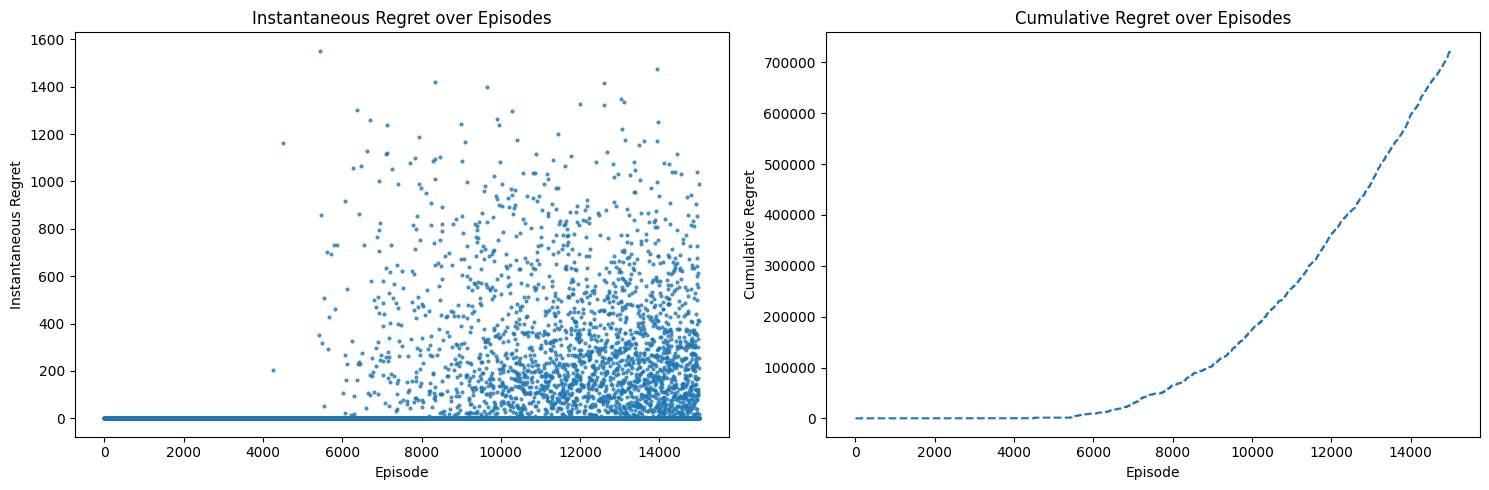

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 10  # Finite horizon
a, b = 2, 5  # Holding and backlog cost rates
p = 3  # Procurement cost per unit
U = 10  # Maximum procurement
num_episodes = 15000  # Number of Monte Carlo simulations
discount = 1.0  # No discounting
min_inventory, max_inventory = -200, 200

def sample_demand():
    return np.random.randint(0, 11)

def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Initialize policy arbitrarily
policy = np.random.randint(0, U+1, size=(T+1, 401))  # (time, stock levels from -200 to 200)
Q = np.zeros((T+1, 401, U+1))  # (time, stock levels, procurement actions)
returns = [[[] for _ in range(401)] for _ in range(T+1)]

instantaneous_regret = []
cumulative_regret = []
cumulative_sum_regret = 0

# Monte Carlo Control Algorithm with Exploring Starts
for episode in range(num_episodes):
    X = np.zeros(T+1, dtype=int)
    U_values = np.zeros(T, dtype=int)
    W = np.zeros(T, dtype=int)
    rewards = np.zeros(T, dtype=float)
    
    X[0] = np.random.randint(-200, 201)
    U_values[0] = np.random.randint(0, U+1)
    
    for t in range(T):
        state_idx = np.clip(X[t] + 200, 0, 400)
        if t > 0:
            U_values[t] = policy[t, state_idx]
        W[t] = sample_demand()
        X[t+1] = X[t] + U_values[t] - W[t]
        rewards[t] = holding_cost(X[t+1]) + p * U_values[t]
    
    G = 0
    optimal_G = np.min(Q[0, np.clip(X[0] + 200, 0, 400), :])
    for t in reversed(range(T)):
        G = rewards[t] + G
        state_idx = np.clip(X[t] + 200, 0, 400)
        returns[t][state_idx].append(G)
        Q[t, state_idx, U_values[t]] = np.mean(returns[t][state_idx])
        policy[t, state_idx] = np.argmin(Q[t, state_idx])
    
    regret = max(0, optimal_G - G)  # Ensure regret is non-negative
    instantaneous_regret.append(regret)
    cumulative_sum_regret += regret
    cumulative_regret.append(cumulative_sum_regret)


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot instantaneous regret on the first subplot
axs[0].scatter(range(num_episodes), instantaneous_regret, alpha=0.7, s=4)
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Instantaneous Regret")
axs[0].set_title("Instantaneous Regret over Episodes")

# Plot cumulative regret on the second subplot
axs[1].plot(range(num_episodes), cumulative_regret, linestyle='dashed')
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Cumulative Regret")
axs[1].set_title("Cumulative Regret over Episodes")

# Layout so plots do not overlap
fig.tight_layout()

plt.show()


## Regret calculation using a different approach

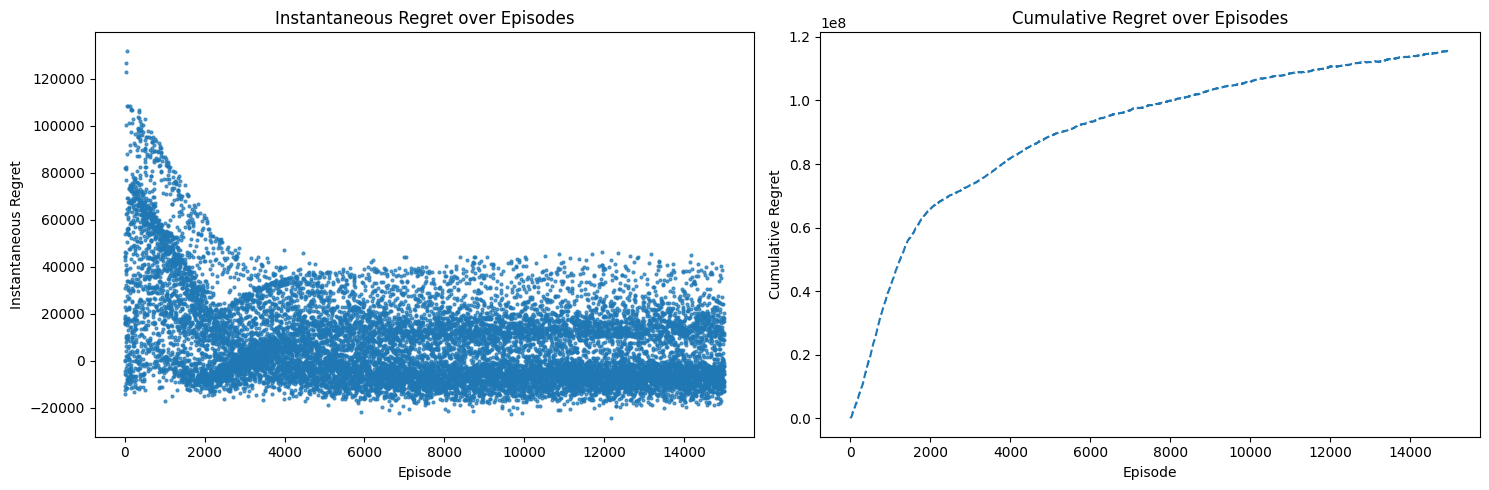

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 100  # Finite horizon
a, b = 2, 5  # Holding and backlog cost rates
p = 3  # Procurement cost per unit
U = 10  # Maximum procurement
num_episodes = 15000  # Number of Monte Carlo simulations
discount = 1.0  # No discounting
min_inventory, max_inventory = -200, 200

def sample_demand():
    return np.random.randint(0, 11)

def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Initialize policy arbitrarily
policy = np.random.randint(0, U+1, size=(T+1, 401))  # (time, stock levels from -200 to 200)
Q = np.zeros((T+1, 401, U+1))  # (time, stock levels, procurement actions)
returns = [[[] for _ in range(401)] for _ in range(T+1)]

# Track G values for each episode and corresponding starting state
G_values = []
starting_states = []

# Monte Carlo Control Algorithm with Exploring Starts
for episode in range(num_episodes):
    X = np.zeros(T+1, dtype=int)
    U_values = np.zeros(T, dtype=int)
    W = np.zeros(T, dtype=int)
    rewards = np.zeros(T, dtype=float)
    
    # Start with a random state
    X[0] = np.random.randint(-200, 201)
    starting_states.append(X[0])  # Save the starting state
    U_values[0] = np.random.randint(0, U+1)
    
    for t in range(T):
        state_idx = np.clip(X[t] + 200, 0, 400)
        if t > 0:
            U_values[t] = policy[t, state_idx]
        W[t] = sample_demand()
        X[t+1] = X[t] + U_values[t] - W[t]
        rewards[t] = holding_cost(X[t+1]) + p * U_values[t]
    
    # Compute return G
    G = 0
    for t in reversed(range(T)):
        G = rewards[t] + G
        state_idx = np.clip(X[t] + 200, 0, 400)
        returns[t][state_idx].append(G)
        Q[t, state_idx, U_values[t]] = np.mean(returns[t][state_idx])
        policy[t, state_idx] = np.argmin(Q[t, state_idx])

    G_values.append(G)  # Save the G value for this episode

# Compute optimal value function for all states at t=0
optimal_values = np.zeros(401)
for state_idx in range(401):
    optimal_values[state_idx] = np.min(Q[0, state_idx, :])

# Compute regret
instantaneous_regret = []
cumulative_regret = []
cumulative_sum = 0

for episode in range(num_episodes):
    start_state = starting_states[episode]
    state_idx = np.clip(start_state + 200, 0, 400)
    optimal_value = optimal_values[state_idx]
    
    regret = -optimal_value + G_values[episode]
    instantaneous_regret.append(regret)
    
    cumulative_sum += regret
    cumulative_regret.append(cumulative_sum)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot instantaneous regret on the first subplot
axs[0].scatter(range(num_episodes), instantaneous_regret, alpha=0.7, s=4)
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Instantaneous Regret")
axs[0].set_title("Instantaneous Regret over Episodes")

# Plot cumulative regret on the second subplot
axs[1].plot(range(num_episodes), cumulative_regret, linestyle='dashed')
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Cumulative Regret")
axs[1].set_title("Cumulative Regret over Episodes")

# Layout so plots do not overlap
fig.tight_layout()
plt.show()


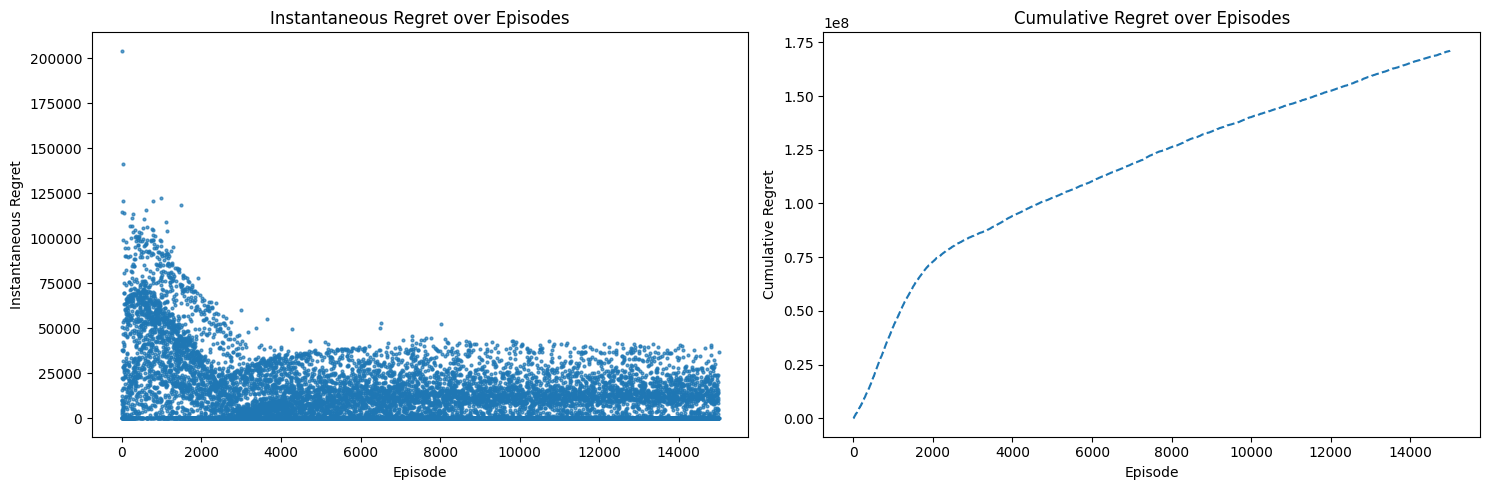

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 100  # Finite horizon
a, b = 2, 5  # Holding and backlog cost rates
p = 3  # Procurement cost per unit
U = 10  # Maximum procurement
num_episodes = 15000  # Number of Monte Carlo simulations
discount = 1.0  # No discounting
min_inventory, max_inventory = -200, 200

def sample_demand():
    return np.random.randint(0, 11)

def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Initialize policy arbitrarily
policy = np.random.randint(0, U+1, size=(T+1, 401))  # (time, stock levels from -200 to 200)
Q = np.zeros((T+1, 401, U+1))  # (time, stock levels, procurement actions)
returns = [[[] for _ in range(401)] for _ in range(T+1)]

# Track G values for each episode and corresponding starting state
G_values = []
starting_states = []

# Monte Carlo Control Algorithm with Exploring Starts
for episode in range(num_episodes):
    X = np.zeros(T+1, dtype=int)
    U_values = np.zeros(T, dtype=int)
    W = np.zeros(T, dtype=int)
    rewards = np.zeros(T, dtype=float)
    
    # Start with a random state
    X[0] = np.random.randint(-200, 201)
    starting_states.append(X[0])  # Save the starting state
    U_values[0] = np.random.randint(0, U+1)
    
    for t in range(T):
        state_idx = np.clip(X[t] + 200, 0, 400)
        if t > 0:
            U_values[t] = policy[t, state_idx]
        W[t] = sample_demand()
        X[t+1] = X[t] + U_values[t] - W[t]
        rewards[t] = holding_cost(X[t+1]) + p * U_values[t]
    
    # Compute return G
    G = 0
    for t in reversed(range(T)):
        G = rewards[t] + G
        state_idx = np.clip(X[t] + 200, 0, 400)
        returns[t][state_idx].append(G)
        Q[t, state_idx, U_values[t]] = np.mean(returns[t][state_idx])
        policy[t, state_idx] = np.argmin(Q[t, state_idx])  # Select best action

    G_values.append(G)  # Save the G value for this episode

# Compute optimal value function for all states at t=0
optimal_values = np.zeros(401)
for state_idx in range(401):
    optimal_values[state_idx] = np.min(Q[0, state_idx, :])  # Best cost at t=0

# Compute regret
instantaneous_regret = []
cumulative_regret = []
cumulative_sum = 0

for episode in range(num_episodes):
    start_state = starting_states[episode]
    state_idx = np.clip(start_state + 200, 0, 400)
    optimal_value = optimal_values[state_idx]  # The best cost if starting from this state
    
    regret = G_values[episode] - optimal_value  # Always >= 0 theoretically
    regret = max(0, regret)  # Ensure non-negative regret due to numerical instability

    instantaneous_regret.append(regret)
    
    cumulative_sum += regret
    cumulative_regret.append(cumulative_sum)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot instantaneous regret on the first subplot
axs[0].scatter(range(num_episodes), instantaneous_regret, alpha=0.7, s=4)
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Instantaneous Regret")
axs[0].set_title("Instantaneous Regret over Episodes")

# Plot cumulative regret on the second subplot
axs[1].plot(range(num_episodes), cumulative_regret, linestyle='dashed')
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Cumulative Regret")
axs[1].set_title("Cumulative Regret over Episodes")

# Layout so plots do not overlap
fig.tight_layout()
plt.show()
